In [1]:
import os 
os.chdir(r'Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp\src')

from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import center_of_mass


In [2]:
import pandas as pd
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/good_units_with_tsnLabels.pkl')
len(df_loaded)
df_good = df_loaded[df_loaded['unit_quality']=="good"]
df_py = df_good[df_good['cell_type']=="pyramidal"]

Fis: statistic = 1.9639610121239315 p-value = 0.049534613435626706
Blade: statistic = 1.9639610121239315 p-value = 0.049534613435626706
Fis_and_bla: statistic = 1.9639610121239315 p-value = 0.049534613435626706


C:\Users\sachur\AppData\Local\Temp\ipykernel_18144\3765839021.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_fis, y=data_fis, ax=ax1, palette=['black', 'grey'], alpha=0.6)
C:\Users\sachur\AppData\Local\Temp\ipykernel_18144\3765839021.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_blade, y=data_blade, ax=ax2, palette=['black', 'grey'], alpha=0.6)
C:\Users\sachur\AppData\Local\Temp\ipykernel_18144\3765839021.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_fis_bla, y=data_fis_bla, ax=ax3, palette=['black

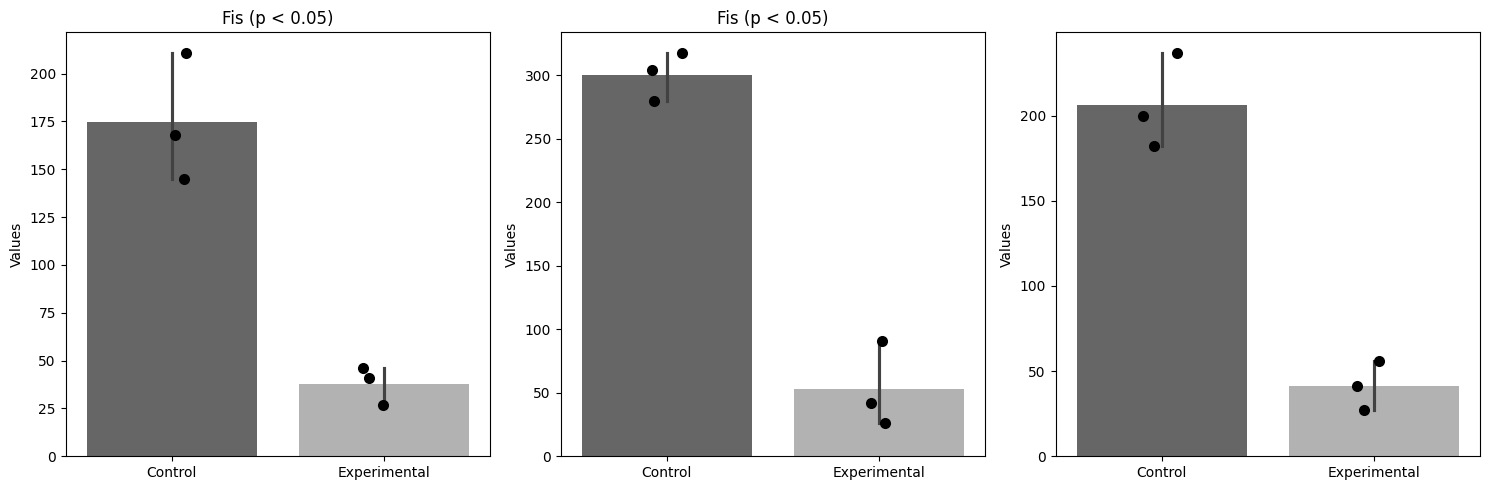

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Data
con_fis = [145, 168, 211]
exp_fis = [27, 41, 46]

con_blade = [280, 304, 318]
exp_blade = [26, 42, 91]

con_fis_and_bla = [182, 200, 237]
exp_fis_and_bla = [27, 41, 56]

# Perform ranksum tests
fis_stat, fis_p = stats.ranksums(con_fis, exp_fis,alternative='two-sided')
blade_stat, blade_p = stats.ranksums(con_blade, exp_blade,alternative='two-sided')
fis_bla_stat, fis_bla_p = stats.ranksums(con_fis_and_bla, exp_fis_and_bla,alternative='two-sided')

# Print results
print("Fis: statistic =", fis_stat, "p-value =", fis_p)
print("Blade: statistic =", blade_stat, "p-value =", blade_p)
print("Fis_and_bla: statistic =", fis_bla_stat, "p-value =", fis_bla_p)

# Prepare data for plotting
data_fis = np.concatenate([con_fis, exp_fis])
data_blade = np.concatenate([con_blade, exp_blade])
data_fis_bla = np.concatenate([con_fis_and_bla, exp_fis_and_bla])

group_fis = ['Control']*len(con_fis) + ['Experimental']*len(exp_fis)
group_blade = ['Control']*len(con_blade) + ['Experimental']*len(exp_blade)
group_fis_bla = ['Control']*len(con_fis_and_bla) + ['Experimental']*len(exp_fis_and_bla)

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot Fis
sns.barplot(x=group_fis, y=data_fis, ax=ax1, palette=['black', 'grey'], alpha=0.6)
sns.stripplot(x=group_fis, y=data_fis, ax=ax1, color='black', size=8)
if fis_p < 0.05:  
    ax1.set_title(f'Fis (p < 0.05)')
else:
    ax1.set_title(f'Fis (p={fis_p:.3f})')
ax1.set_ylabel('Values')
ax1.set_ylabel('Values')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# Plot Blade
sns.barplot(x=group_blade, y=data_blade, ax=ax2, palette=['black', 'grey'], alpha=0.6)
sns.stripplot(x=group_blade, y=data_blade, ax=ax2, color='black', size=8)
if blade_p< 0.05:
    ax2.set_title(f'Fis (p < 0.05)')
else:
    ax2.set_title(f'Blade (p={blade_p:.3f})')
ax2.set_ylabel('Values')
ax2.set_ylabel('Values')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

# Plot Fis_and_bla
sns.barplot(x=group_fis_bla, y=data_fis_bla, ax=ax3, palette=['black', 'grey'], alpha=0.6)
sns.stripplot(x=group_fis_bla, y=data_fis_bla, ax=ax3, color='black', size=8)
if blade_p< 0.05:
    ax3.set_title(f'Fis (p < 0.05)')
else:
    ax3.set_title(f'Fis_and_bla (p={fis_bla_p:.3f})')
ax3.set_ylabel('Values')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)

plt.tight_layout()
plt.show()

In [9]:
df=df_py
session = "A"
if session == "Total":
    df_a = df
else:
    df_a = df[df['session'] == session]


Comparison for amplitude_median (Session A):
Control mean: -504.14 ± 16.89
Experimental mean: -510.58 ± 14.97
Mann-Whitney U statistic: 26678.50, p-value: 0.1868
KS statistic: 0.11, p-value: 0.1272

Comparison for half_width (Session A):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 28291.00, p-value: 0.0124
KS statistic: 0.13, p-value: 0.0359

Comparison for peak_to_valley (Session A):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 24634.00, p-value: 0.8602
KS statistic: 0.10, p-value: 0.2379

Comparison for peak_trough_ratio (Session A):
Control mean: -0.19 ± 0.00
Experimental mean: -0.18 ± 0.00
Mann-Whitney U statistic: 20560.00, p-value: 0.0016
KS statistic: 0.18, p-value: 0.0010


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `


Comparison for recovery_slope (Session A):
Control mean: -126259.09 ± 6916.82
Experimental mean: -139048.53 ± 26285.49
Mann-Whitney U statistic: 23171.00, p-value: 0.2123
KS statistic: 0.09, p-value: 0.3473

Comparison for repolarization_slope (Session A):
Control mean: 1111188.68 ± 44897.20
Experimental mean: 1112137.09 ± 40795.12
Mann-Whitney U statistic: 23555.00, p-value: 0.3340
KS statistic: 0.09, p-value: 0.3714

Comparison for mean_firing_rate (Session A):
Control mean: 1.33 ± 0.08
Experimental mean: 1.76 ± 0.12
Mann-Whitney U statistic: 21049.00, p-value: 0.0051
KS statistic: 0.13, p-value: 0.0536

Comparison for mean_inter_spike_interval (Session A):
Control mean: 1.92 ± 0.14
Experimental mean: 1.37 ± 0.09
Mann-Whitney U statistic: 28701.00, p-value: 0.0051
KS statistic: 0.13, p-value: 0.0536


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `


Comparison for mode_inter_spike_interval (Session A):
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 23481.00, p-value: 0.3075
KS statistic: 0.09, p-value: 0.2744

Comparison for bursting_index (Session A):
Control mean: 0.62 ± 0.02
Experimental mean: 0.58 ± 0.02
Mann-Whitney U statistic: 29509.00, p-value: 0.0007
KS statistic: 0.18, p-value: 0.0012


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


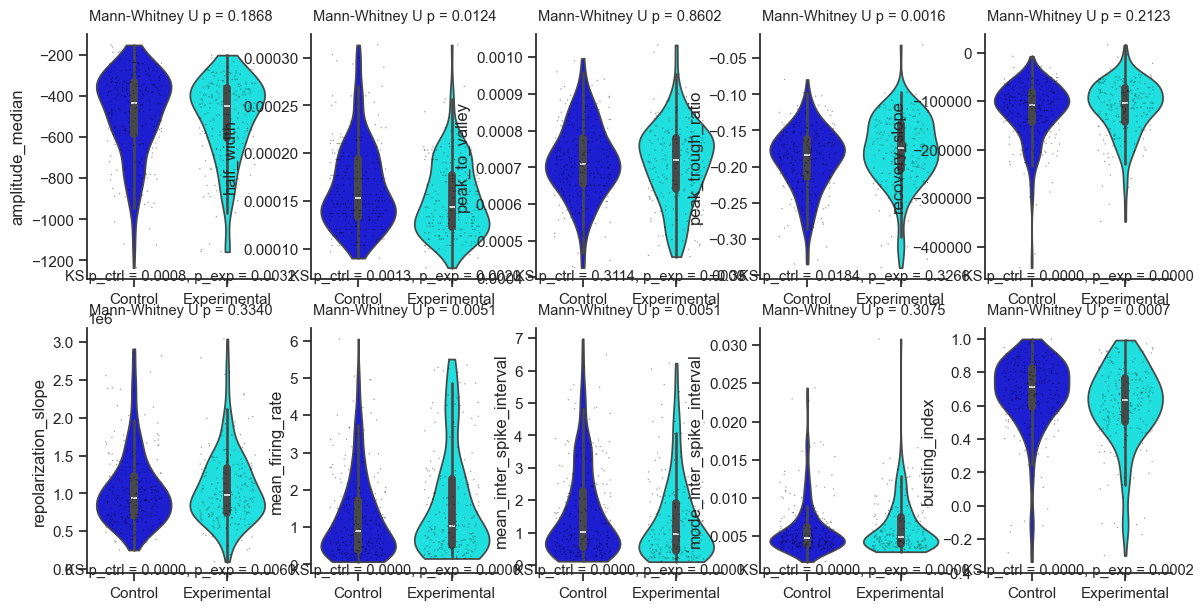

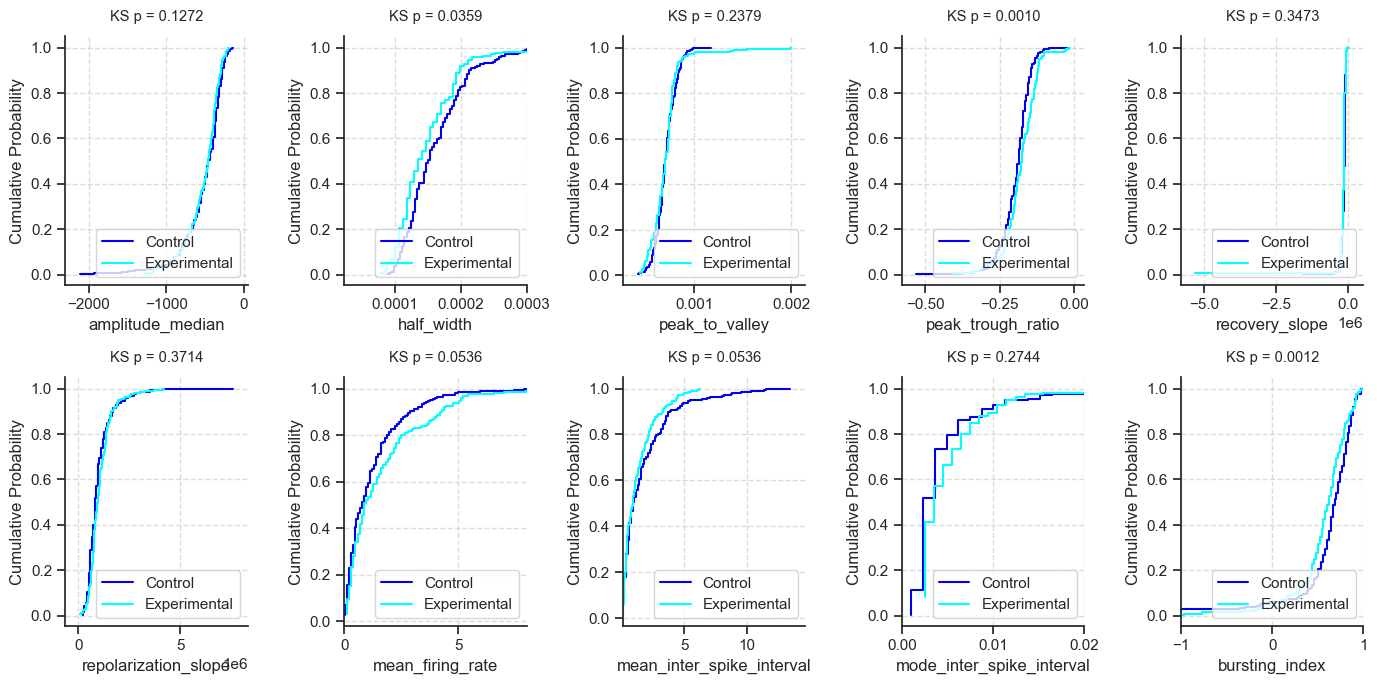


Comparison for amplitude_median (Session B):
Control mean: -504.95 ± 21.90
Experimental mean: -559.50 ± 21.92
Mann-Whitney U statistic: 14324.00, p-value: 0.0898
KS statistic: 0.11, p-value: 0.2245

Comparison for half_width (Session B):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 13980.00, p-value: 0.1983
KS statistic: 0.11, p-value: 0.2360

Comparison for peak_to_valley (Session B):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 11501.00, p-value: 0.0941
KS statistic: 0.09, p-value: 0.5610

Comparison for peak_trough_ratio (Session B):
Control mean: -0.18 ± 0.00
Experimental mean: -0.17 ± 0.00
Mann-Whitney U statistic: 10521.00, p-value: 0.0045
KS statistic: 0.22, p-value: 0.0006

Comparison for recovery_slope (Session B):
Control mean: -116348.59 ± 5163.21
Experimental mean: -114600.34 ± 4077.67


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

Mann-Whitney U statistic: 13046.00, p-value: 0.8649
KS statistic: 0.08, p-value: 0.7184

Comparison for repolarization_slope (Session B):
Control mean: 1095322.34 ± 50305.28
Experimental mean: 1155867.45 ± 51134.31
Mann-Whitney U statistic: 12357.00, p-value: 0.5147
KS statistic: 0.11, p-value: 0.3104

Comparison for mean_firing_rate (Session B):
Control mean: 1.49 ± 0.14
Experimental mean: 1.81 ± 0.13
Mann-Whitney U statistic: 11333.00, p-value: 0.0609
KS statistic: 0.18, p-value: 0.0118

Comparison for mean_inter_spike_interval (Session B):
Control mean: 1.61 ± 0.13
Experimental mean: 1.62 ± 0.16
Mann-Whitney U statistic: 14476.00, p-value: 0.0604
KS statistic: 0.18, p-value: 0.0118

Comparison for mode_inter_spike_interval (Session B):
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

Mann-Whitney U statistic: 12368.50, p-value: 0.5236
KS statistic: 0.09, p-value: 0.5268

Comparison for bursting_index (Session B):
Control mean: 0.60 ± 0.03
Experimental mean: 0.59 ± 0.02
Mann-Whitney U statistic: 14725.00, p-value: 0.0296
KS statistic: 0.18, p-value: 0.0091


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


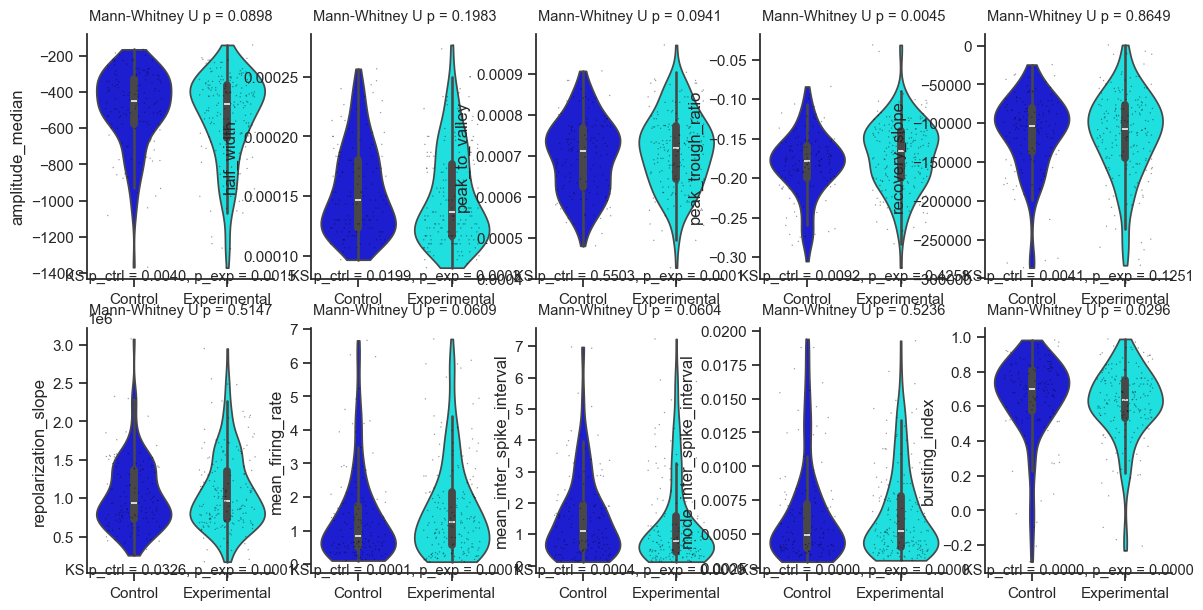

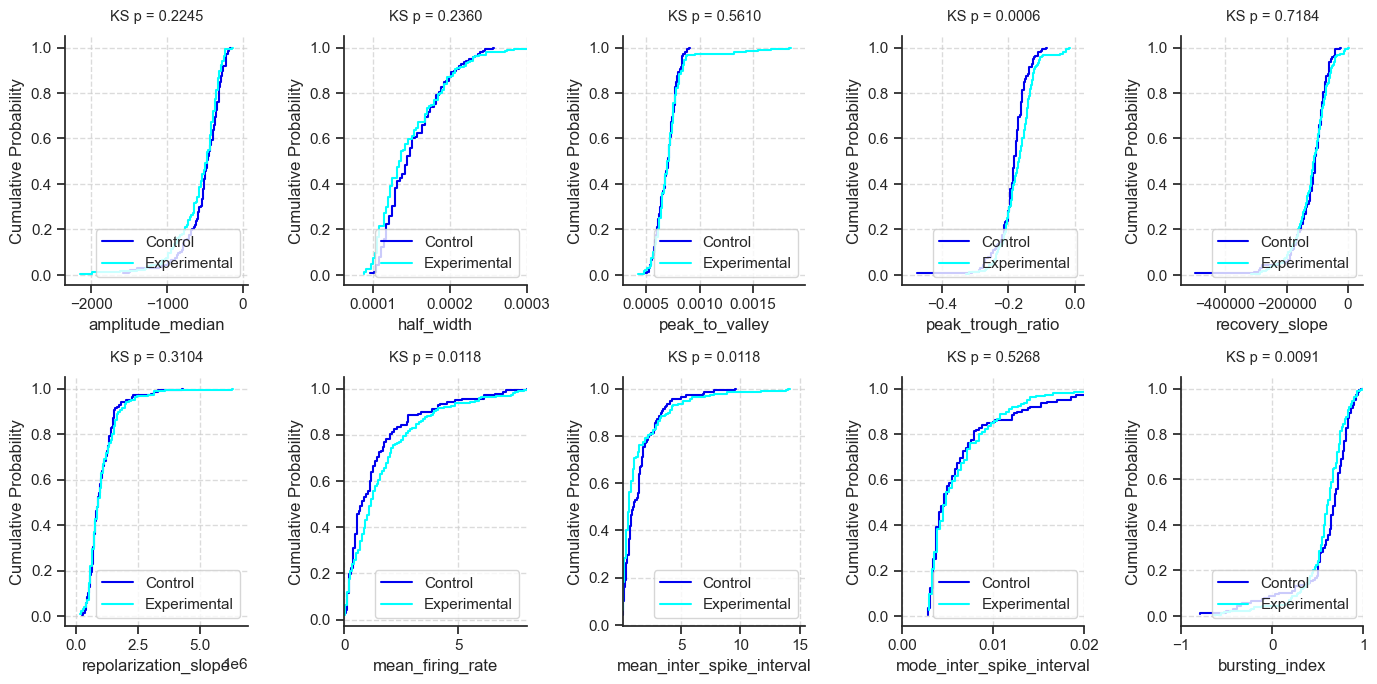


Comparison for amplitude_median (Session C):
Control mean: -528.15 ± 22.48
Experimental mean: -546.11 ± 22.36
Mann-Whitney U statistic: 10747.00, p-value: 0.9483
KS statistic: 0.06, p-value: 0.9591

Comparison for half_width (Session C):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 11728.00, p-value: 0.2026
KS statistic: 0.10, p-value: 0.4316

Comparison for peak_to_valley (Session C):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 10732.00, p-value: 0.9320
KS statistic: 0.10, p-value: 0.3686

Comparison for peak_trough_ratio (Session C):
Control mean: -0.18 ± 0.00
Experimental mean: -0.17 ± 0.00
Mann-Whitney U statistic: 9188.00, p-value: 0.0282
KS statistic: 0.16, p-value: 0.0500

Comparison for recovery_slope (Session C):
Control mean: -123210.58 ± 5309.67
Experimental mean: -111831.00 ± 4617.09


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

Mann-Whitney U statistic: 9180.00, p-value: 0.0275
KS statistic: 0.15, p-value: 0.0766


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(



Comparison for repolarization_slope (Session C):
Control mean: 1227439.90 ± 65959.62
Experimental mean: 1140935.21 ± 47849.21
Mann-Whitney U statistic: 11498.00, p-value: 0.3374
KS statistic: 0.09, p-value: 0.6107

Comparison for mean_firing_rate (Session C):
Control mean: 1.33 ± 0.12
Experimental mean: 1.76 ± 0.13
Mann-Whitney U statistic: 9143.00, p-value: 0.0241
KS statistic: 0.16, p-value: 0.0333

Comparison for mean_inter_spike_interval (Session C):
Control mean: 1.66 ± 0.12
Experimental mean: 1.54 ± 0.14
Mann-Whitney U statistic: 12448.00, p-value: 0.0240
KS statistic: 0.16, p-value: 0.0333

Comparison for mode_inter_spike_interval (Session C):
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 10834.50, p-value: 0.9575
KS statistic: 0.05, p-value: 0.9777


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `


Comparison for bursting_index (Session C):
Control mean: 0.60 ± 0.03
Experimental mean: 0.58 ± 0.02
Mann-Whitney U statistic: 12399.00, p-value: 0.0285
KS statistic: 0.20, p-value: 0.0045


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


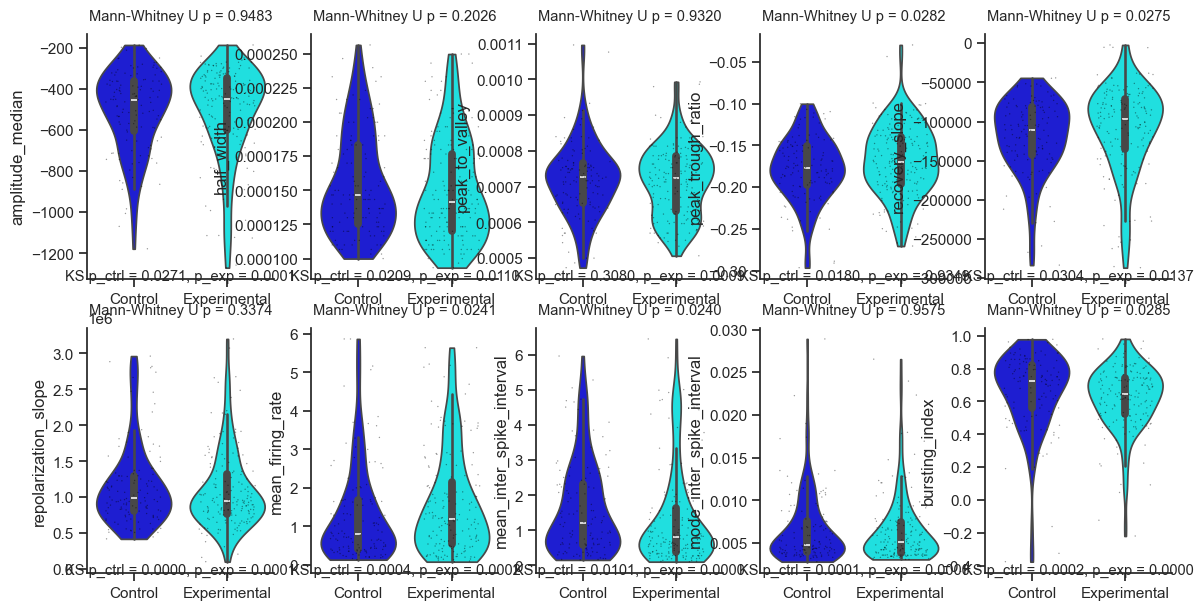

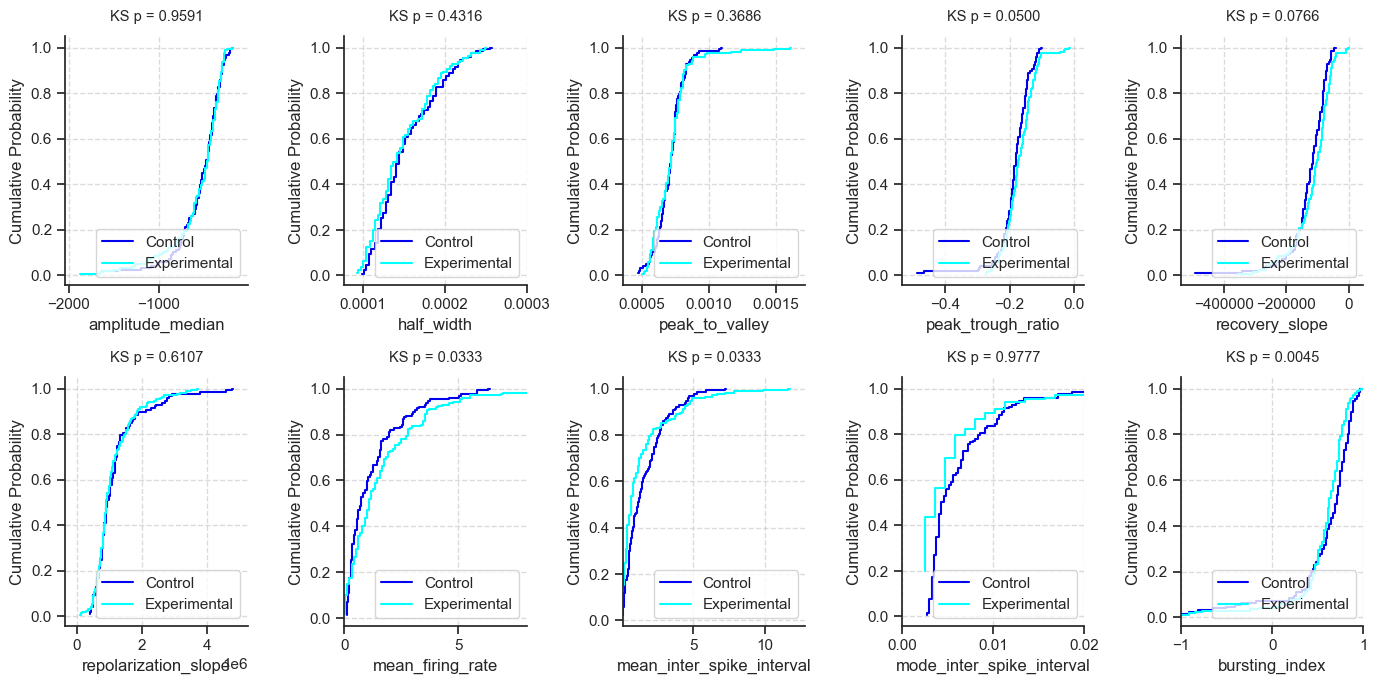


Comparison for amplitude_median (Session Total):
Control mean: -510.28 ± 11.49
Experimental mean: -537.90 ± 11.41
Mann-Whitney U statistic: 152785.00, p-value: 0.0573
KS statistic: 0.07, p-value: 0.1934

Comparison for half_width (Session Total):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 159920.50, p-value: 0.0009
KS statistic: 0.11, p-value: 0.0046

Comparison for peak_to_valley (Session Total):
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 138163.50, p-value: 0.3222
KS statistic: 0.08, p-value: 0.0449

Comparison for peak_trough_ratio (Session Total):
Control mean: -0.19 ± 0.00
Experimental mean: -0.17 ± 0.00
Mann-Whitney U statistic: 117178.00, p-value: 0.0000
KS statistic: 0.18, p-value: 0.0000


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `


Comparison for recovery_slope (Session Total):
Control mean: -122851.69 ± 3859.03
Experimental mean: -122503.94 ± 9610.37
Mann-Whitney U statistic: 133390.00, p-value: 0.0532
KS statistic: 0.08, p-value: 0.0501

Comparison for repolarization_slope (Session Total):
Control mean: 1135604.89 ± 30384.71
Experimental mean: 1135650.14 ± 26851.64
Mann-Whitney U statistic: 140197.00, p-value: 0.5567
KS statistic: 0.03, p-value: 0.8920

Comparison for mean_firing_rate (Session Total):
Control mean: 1.37 ± 0.06
Experimental mean: 1.78 ± 0.07
Mann-Whitney U statistic: 122388.00, p-value: 0.0000
KS statistic: 0.14, p-value: 0.0001

Comparison for mean_inter_spike_interval (Session Total):
Control mean: 1.77 ± 0.08
Experimental mean: 1.50 ± 0.08
Mann-Whitney U statistic: 163959.00, p-value: 0.0000
KS statistic: 0.14, p-value: 0.0001


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `


Comparison for mode_inter_spike_interval (Session Total):
Control mean: 0.01 ± 0.00
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 136771.50, p-value: 0.2058
KS statistic: 0.07, p-value: 0.1911

Comparison for bursting_index (Session Total):
Control mean: 0.61 ± 0.02
Experimental mean: 0.58 ± 0.01
Mann-Whitney U statistic: 167128.00, p-value: 0.0000
KS statistic: 0.15, p-value: 0.0000


C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17672\3000336979.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


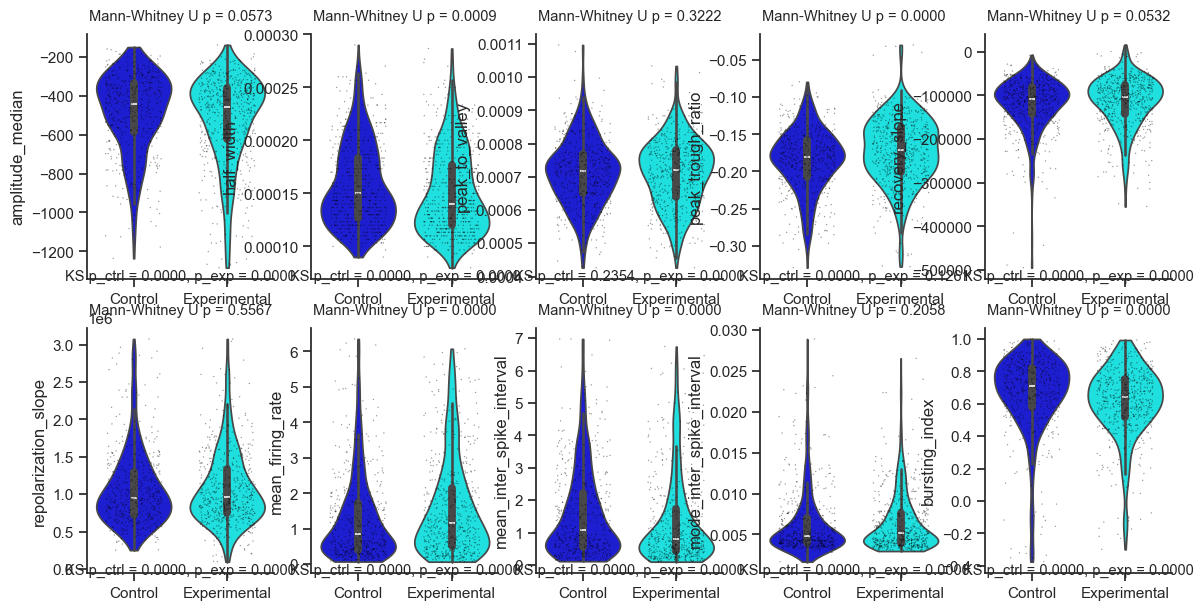

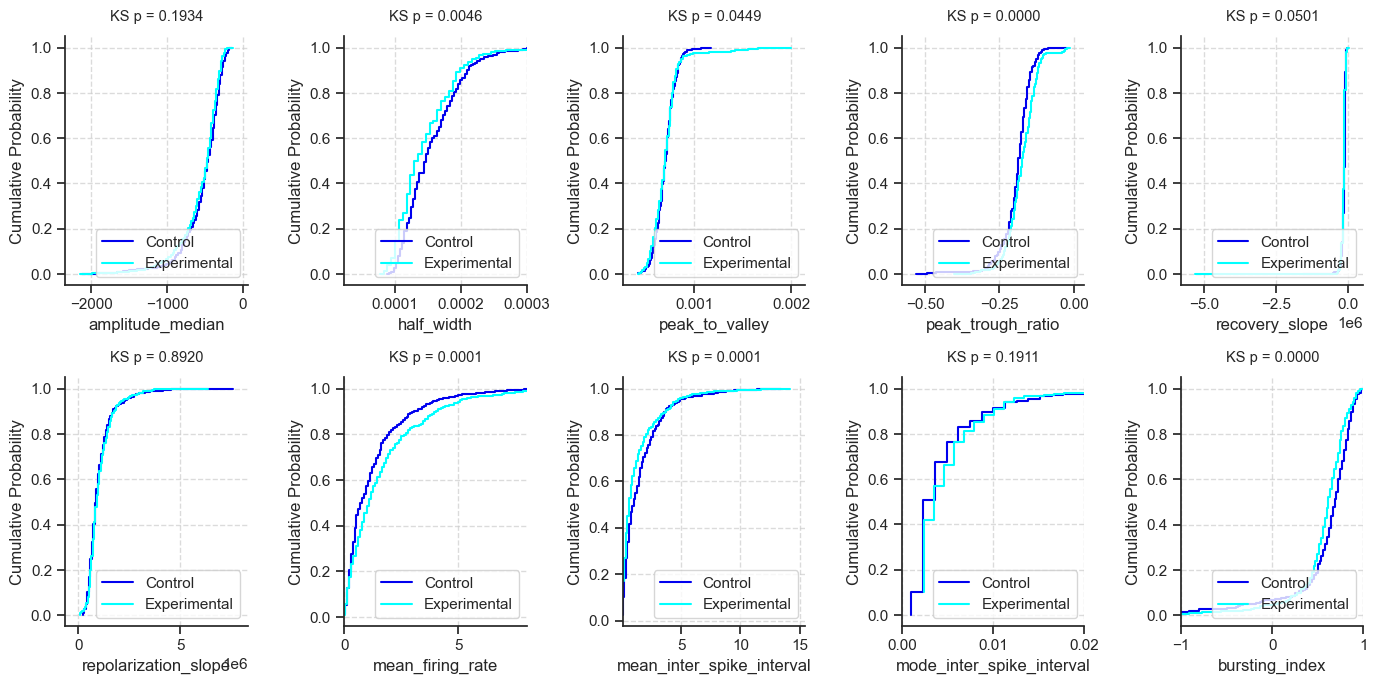

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Set global font size to 10.5
plt.rcParams.update({'font.size': 10.5})

# Load Good units
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements.pkl')
df_good = df_loaded[df_loaded['unit_quality'] == "good"]
df_py = df_good[df_good['buzaki_py_cell_type'] == "pyramidal"]

funct = [""]
for functional_plot in funct:
    if functional_plot:
        df = df_py[df_py['functional_cell_type'] == "Place cell"]
    else:
        df = df_py

    base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/cell_type"

    control_ids = ['65165', '65091', '63383', '66539', '65622']
    exp_ids = ['65588', '63385', '66538', '66537', '66922']

    session = ["A", "B", "C", "Total"]

    for session in session:
        if session == "Total":
            df_a = df
        else:
            df_a = df[df['session'] == session]

        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

        sns.set_theme(style="ticks")

        metrics = ['amplitude_median','half_width','peak_to_valley','peak_trough_ratio', 'recovery_slope', 'repolarization_slope', 
                  'mean_firing_rate',  'mean_inter_spike_interval',"mode_inter_spike_interval",
                  'bursting_index', ]

        # Define x-axis limits: (lower, upper), None for full auto, or (fixed, None)/(None, fixed) for one-sided
        xlim_dict = {
            'half_width': (None, 0.0003),              # Upper fixed, lower auto
            'recovery_slope': (None, None),     # Lower fixed, upper auto
            'repolarization_slope': None,     # Full auto
            'mean_firing_rate': (0, 8),       # Upper fixed, lower auto
            'peak_trough_ratio': (None, None), # Full auto
            'peak_to_valley': None,           # Full auto
            'bursting_index': (-1, 1),         # Upper fixed, lower auto
            'mean_inter_spike_interval': (0.1, None), # Lower fixed, upper auto
            'amplitude_median': None,          # Full auto
            'mode_inter_spike_interval': (0,0.02)
        }

        fig_violin, axes_violin = plt.subplots(2, 5, figsize=(14,7))
        axes_violin = axes_violin.flatten()

        fig_cdf, axes_cdf = plt.subplots(2, 5, figsize=(14,7))
        axes_cdf = axes_cdf.flatten()

        control_color = sns.color_palette(palette='flag')[-1]
        exp_color = "cyan"

        for idx, metric in enumerate(metrics):
            control_values = control_df[metric].dropna()
            exp_values = exp_df[metric].dropna()

            if len(control_values) > 0 and len(exp_values) > 0:
                control_mean = control_values.mean()
                exp_mean = exp_values.mean()
                control_sem = control_values.sem()
                exp_sem = exp_values.sem()

                print(f"\nComparison for {metric} (Session {session}):")
                print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
                print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")

                # Original statistical tests for violin plot
                control_ks_stat, control_ks_p = stats.kstest(control_values, 'norm', 
                                                             args=(control_mean, control_values.std()))
                exp_ks_stat, exp_ks_p = stats.kstest(exp_values, 'norm', 
                                                     args=(exp_mean, exp_values.std()))
                normal = control_ks_p > 0.05 and exp_ks_p > 0.05

                levene_stat, levene_p = stats.levene(control_values, exp_values)
                homoscedastic = levene_p > 0.05

                if normal and homoscedastic:
                    t_stat, p_val = stats.ttest_ind(control_values, exp_values, equal_var=True)
                    test_name = "t-test"
                    print(f"T-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
                else:
                    u_stat, p_val = stats.mannwhitneyu(control_values, exp_values, alternative='two-sided')
                    test_name = "Mann-Whitney U"
                    print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")

                # Two-sample KS test for CDF
                ks_stat, ks_p = stats.ks_2samp(control_values, exp_values)
                print(f"KS statistic: {ks_stat:.2f}, p-value: {ks_p:.4f}")

                # Violin Plot
                plot_df = pd.DataFrame({
                    'value': pd.concat([control_values, exp_values]),
                    'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
                })
                all_values = plot_df['value']
                mean_val = all_values.mean()
                std_val = all_values.std()
                plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                           (plot_df['value'] <= mean_val + 3 * std_val)]

                sns.violinplot(
                    data=plot_df_filtered, x='group', y='value', ax=axes_violin[idx],
                    palette={"Control": control_color, "Experimental": exp_color}, width=0.8, cut=0
                )
                for patch in axes_violin[idx].collections:
                    patch.set_alpha(1)

                sns.stripplot(
                    data=plot_df_filtered, x='group', y='value', ax=axes_violin[idx], size=1,
                    hue='group', palette={"Control": "black", "Experimental": "black"},
                    alpha=0.4, jitter=0.3, legend=False
                )

                #axes_violin[idx].set_title(f'{metric} Comparison')
                axes_violin[idx].set_ylabel(metric)
                axes_violin[idx].set_xlabel('')
                axes_violin[idx].yaxis.grid(False)
                axes_violin[idx].text(0.5, 0.04, f'KS p_ctrl = {control_ks_p:.4f}, p_exp = {exp_ks_p:.4f}', 
                                     ha='center', va='top', transform=axes_violin[idx].transAxes, fontsize=10.5)
                axes_violin[idx].text(0.5, 1.1, f'{test_name} p = {p_val:.4f}', 
                                     ha='center', va='top', transform=axes_violin[idx].transAxes, fontsize=10.5)
                axes_violin[idx].spines['top'].set_visible(False)
                axes_violin[idx].spines['right'].set_visible(False)
                axes_violin[idx].spines['bottom'].set_visible(True)
                axes_violin[idx].spines['left'].set_visible(True)

                # CDF Plot
                control_cfreq = stats.cumfreq(control_values, numbins=100)
                exp_cfreq = stats.cumfreq(exp_values, numbins=100)

                control_cdf = control_cfreq.cumcount / control_cfreq.cumcount[-1]
                exp_cdf = exp_cfreq.cumcount / exp_cfreq.cumcount[-1]

                num_bins = len(control_cfreq.cumcount)
                control_x = control_cfreq.lowerlimit + np.linspace(0, control_cfreq.binsize * num_bins, num_bins)
                num_bins = len(exp_cfreq.cumcount)
                exp_x = exp_cfreq.lowerlimit + np.linspace(0, exp_cfreq.binsize * num_bins, num_bins)

                axes_cdf[idx].step(control_x, control_cdf, label='Control', color=control_color, linewidth=1.5)
                axes_cdf[idx].step(exp_x, exp_cdf, label='Experimental', color=exp_color, linewidth=1.5)

                # Set x-axis limits based on xlim_dict
                xlim_setting = xlim_dict[metric]
                if xlim_setting is None or xlim_setting == (None, None):
                    min_val = min(control_values.min(), exp_values.min())
                    max_val = max(control_values.max(), exp_values.max())
                    padding = (max_val - min_val) * 0.1
                    xlim = (min_val - padding, max_val + padding)
                elif isinstance(xlim_setting, tuple):
                    min_val = min(control_values.min(), exp_values.min())
                    max_val = max(control_values.max(), exp_values.max())
                    padding = (max_val - min_val) * 0.1
                    lower = xlim_setting[0] if xlim_setting[0] is not None else min_val - padding
                    upper = xlim_setting[1] if xlim_setting[1] is not None else max_val + padding
                    xlim = (lower, upper)
                else:
                    raise ValueError(f"Invalid xlim setting for {metric}: {xlim_setting}")

                axes_cdf[idx].set_xlim(xlim)

                #axes_cdf[idx].set_title(f'{metric} CDF')
                axes_cdf[idx].set_xlabel(metric)
                axes_cdf[idx].set_ylabel('Cumulative Probability')
                axes_cdf[idx].legend(loc='lower right')
                axes_cdf[idx].grid(True, linestyle='--', alpha=0.7)
                axes_cdf[idx].text(0.5, 1.05, f'KS p = {ks_p:.4f}', 
                                  ha='center', va='bottom', transform=axes_cdf[idx].transAxes, fontsize=10.5)
                axes_cdf[idx].spines['top'].set_visible(False)
                axes_cdf[idx].spines['right'].set_visible(False)

        fig_violin.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}.eps', format='eps', bbox_inches='tight')
        fig_violin.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}.png', format='png', bbox_inches='tight')

        fig_cdf.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}_cdf.eps', format='eps', bbox_inches='tight')
        fig_cdf.savefig(fr'{base_folder}/{session}_waveforms_pyramidal_{functional_plot}_cdf.png', format='png', bbox_inches='tight')

        plt.tight_layout()
        plt.show()


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: -1.90, p-value: 0.0592

Comparison for recovery_slope:
Control mean: -131567.14 ± 27359.45
Experimental mean: -112598.58 ± 7273.15
Mann-Whitney U statistic: 2946.00, p-value: 0.0387

Comparison for repolarization_slope:
Control mean: 2225833.81 ± 201640.57
Experimental mean: 2024446.02 ± 188318.19
Mann-Whitney U statistic: 2621.00, p-value: 0.4760

Comparison for firing_range:
Control mean: 17.09 ± 1.43
Experimental mean: 16.90 ± 1.37
T-test statistic: 0.09, p-value: 0.9267


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i


Comparison for peak_trough_ratio:
Control mean: -0.25 ± 0.01
Experimental mean: -0.26 ± 0.01
T-test statistic: 0.18, p-value: 0.8575

Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 1812.00, p-value: 0.0079

Comparison for bursting_index:
Control mean: -0.33 ± 0.06
Experimental mean: -0.51 ± 0.06
Mann-Whitney U statistic: 2964.00, p-value: 0.0320

Comparison for mean_inter_spike_interval:
Control mean: 0.73 ± 0.26
Experimental mean: 0.17 ± 0.04
Mann-Whitney U statistic: 2212.00, p-value: 0.3232


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i


Comparison for amplitude_median:
Control mean: -323.65 ± 30.67
Experimental mean: -338.82 ± 15.52
Mann-Whitney U statistic: 3065.50, p-value: 0.0103


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


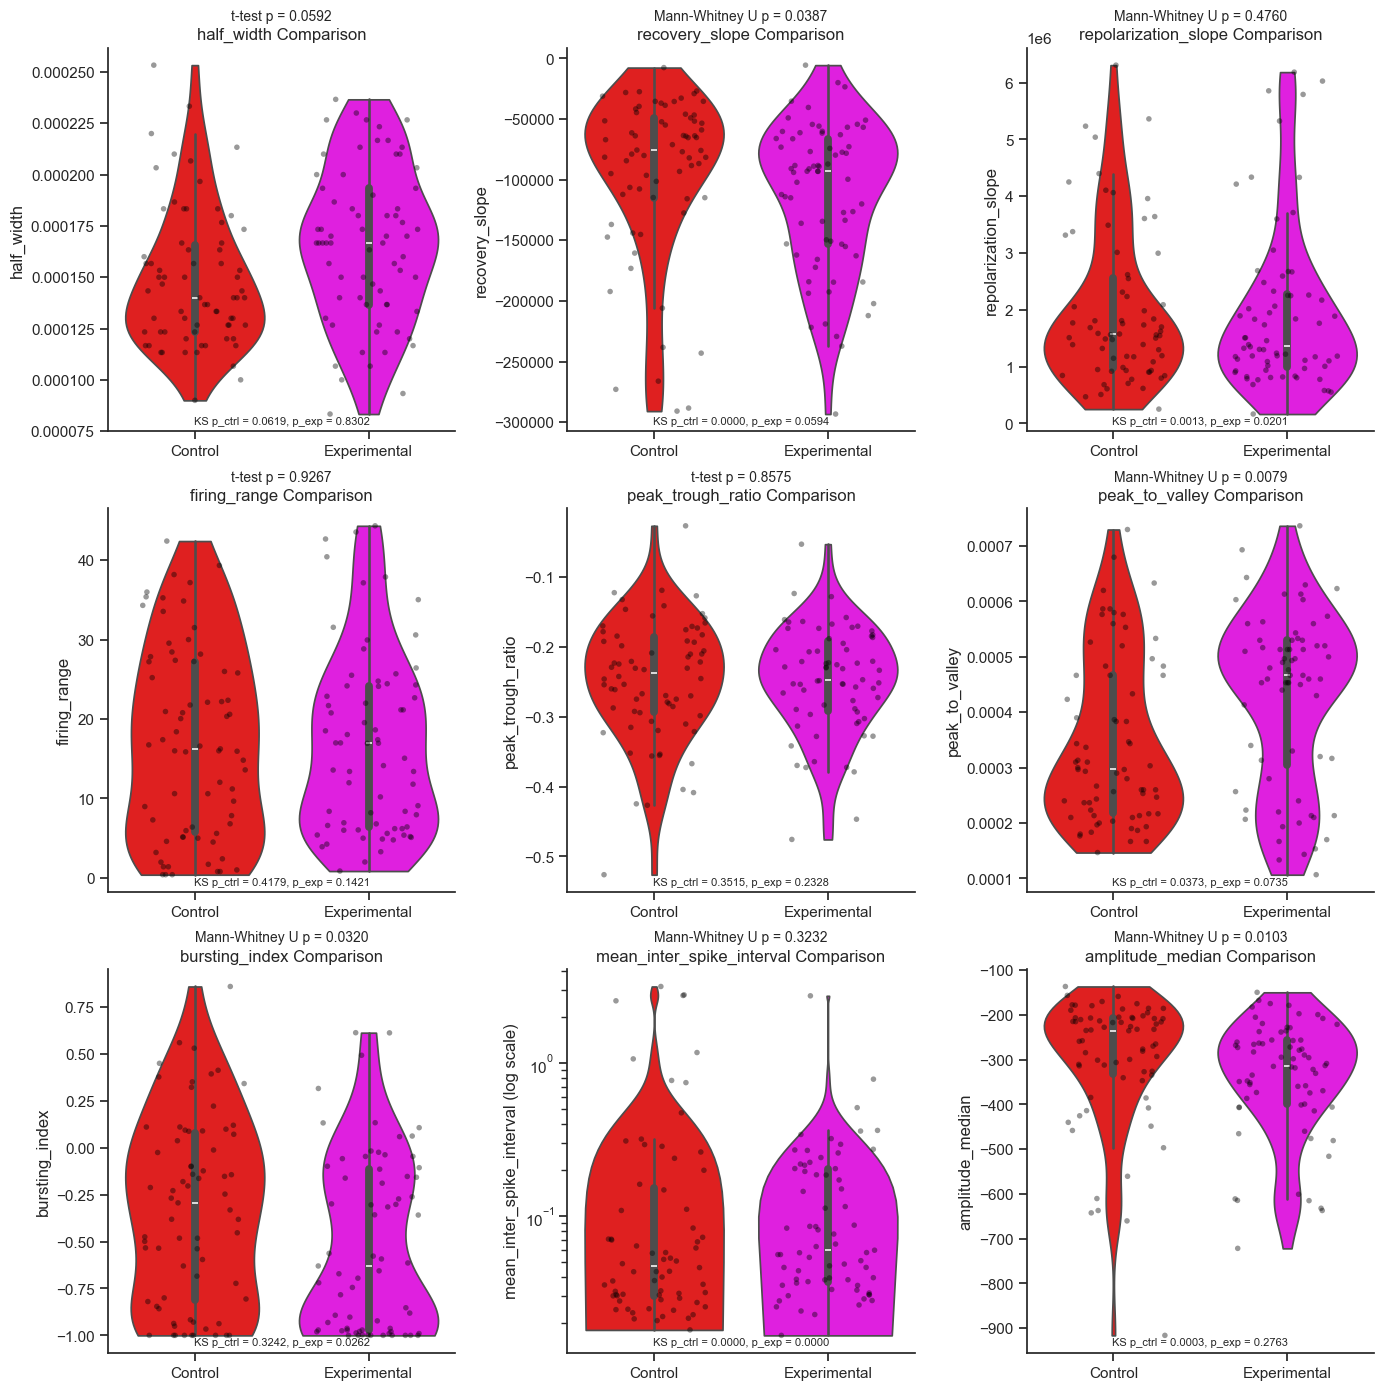


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 665.50, p-value: 0.0128

Comparison for recovery_slope:
Control mean: -122540.55 ± 13066.14
Experimental mean: -105103.07 ± 7589.58
Mann-Whitney U statistic: 883.00, p-value: 0.4830

Comparison for repolarization_slope:
Control mean: 2838851.58 ± 332585.94
Experimental mean: 2027473.97 ± 200229.71
Mann-Whitney U statistic: 1256.00, p-value: 0.0188

Comparison for firing_range:
Control mean: 20.08 ± 1.80
Experimental mean: 16.04 ± 1.25
T-test statistic: 1.89, p-value: 0.0616


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i


Comparison for peak_trough_ratio:
Control mean: -0.27 ± 0.01
Experimental mean: -0.28 ± 0.01
T-test statistic: 0.06, p-value: 0.9520

Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 726.00, p-value: 0.0465

Comparison for bursting_index:
Control mean: -0.21 ± 0.08
Experimental mean: -0.45 ± 0.07
Mann-Whitney U statistic: 1274.00, p-value: 0.0125

Comparison for mean_inter_spike_interval:
Control mean: 0.17 ± 0.07
Experimental mean: 0.27 ± 0.11
Mann-Whitney U statistic: 781.00, p-value: 0.1240


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i


Comparison for amplitude_median:
Control mean: -335.42 ± 27.72
Experimental mean: -315.21 ± 16.71
T-test statistic: -0.66, p-value: 0.5081


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


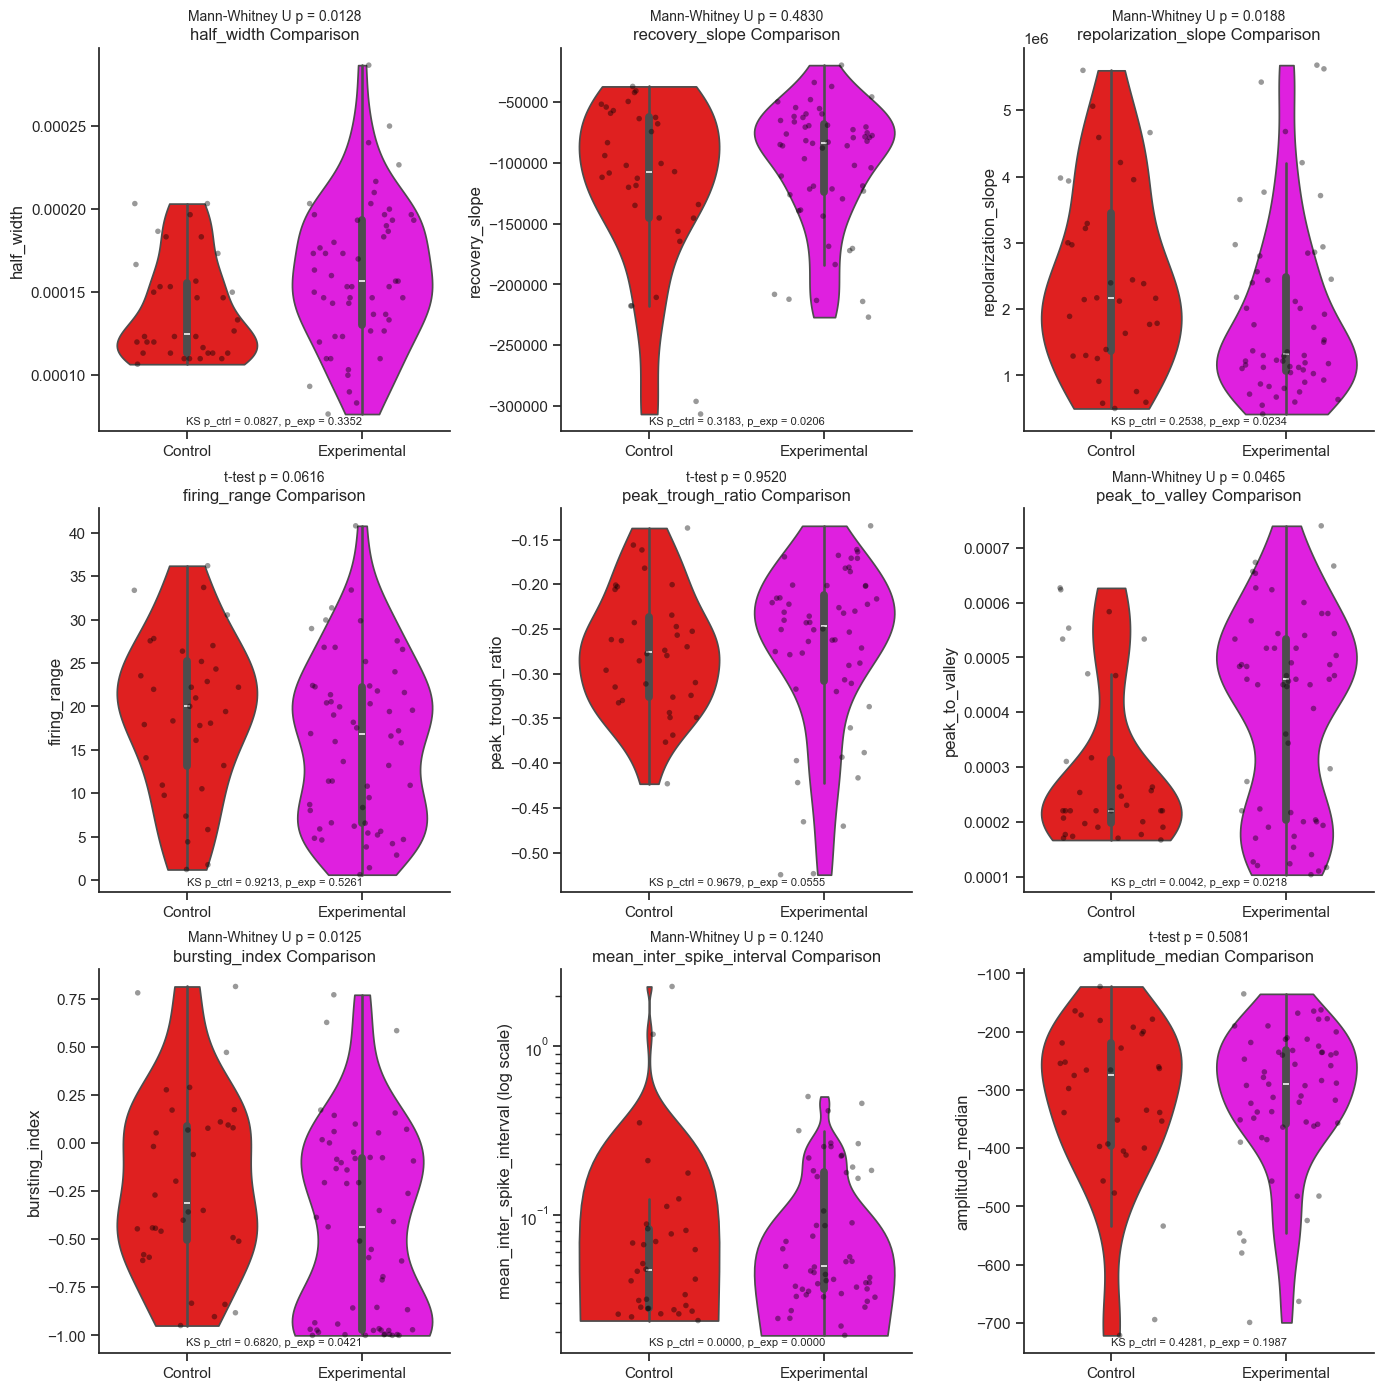


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: -1.55, p-value: 0.1245

Comparison for recovery_slope:
Control mean: -98878.94 ± 12001.20
Experimental mean: -109974.60 ± 8786.84
T-test statistic: 0.71, p-value: 0.4775

Comparison for repolarization_slope:
Control mean: 2383868.64 ± 267026.23
Experimental mean: 2232016.97 ± 239417.36
Mann-Whitney U statistic: 656.00, p-value: 0.2559

Comparison for firing_range:
Control mean: 21.87 ± 3.16
Experimental mean: 14.71 ± 1.26
T-test statistic: 2.55, p-value: 0.0131

Comparison for peak_trough_ratio:
Control mean: -0.26 ± 0.02
Experimental mean: -0.27 ± 0.02


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

T-test statistic: 0.21, p-value: 0.8366

Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 433.00, p-value: 0.1253

Comparison for bursting_index:
Control mean: -0.36 ± 0.10
Experimental mean: -0.51 ± 0.06
Mann-Whitney U statistic: 661.00, p-value: 0.2316

Comparison for mean_inter_spike_interval:
Control mean: 0.17 ± 0.11
Experimental mean: 0.18 ± 0.05
Mann-Whitney U statistic: 376.00, p-value: 0.0266

Comparison for amplitude_median:
Control mean: -311.50 ± 30.29
Experimental mean: -335.45 ± 18.24


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

T-test statistic: 0.70, p-value: 0.4855


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


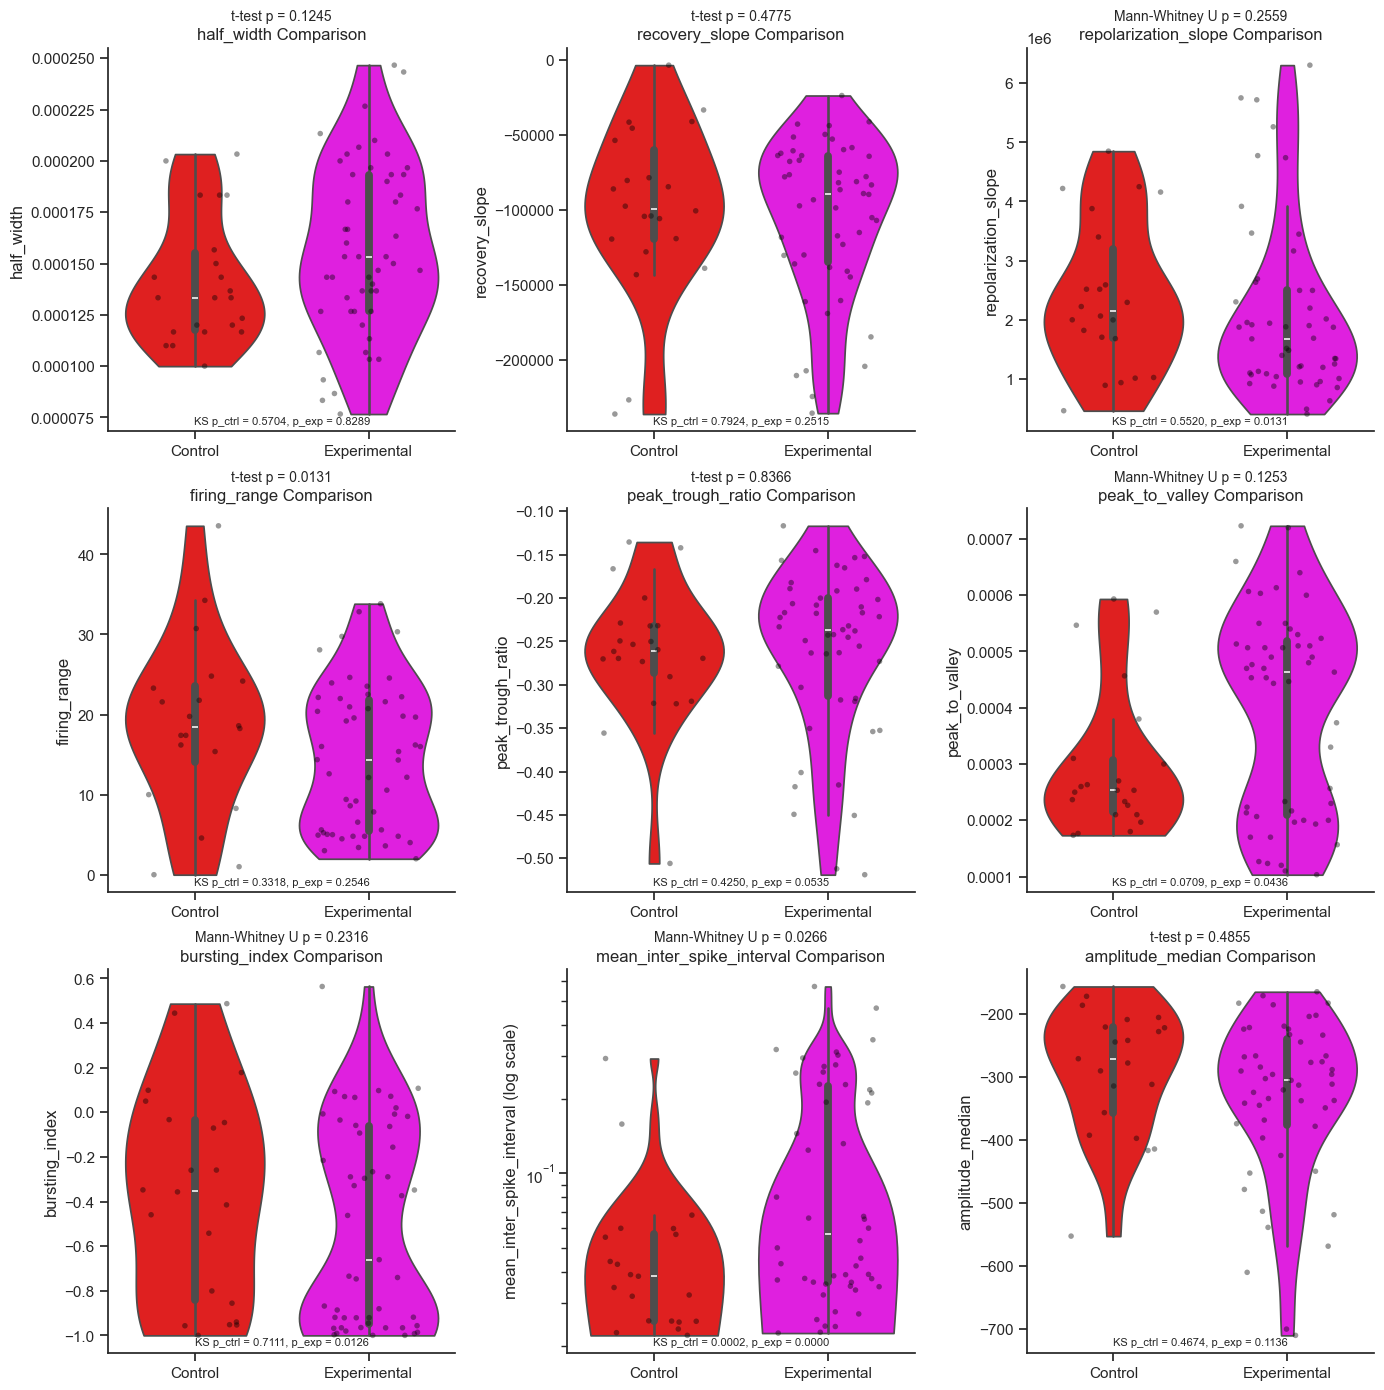


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 8337.50, p-value: 0.0001

Comparison for recovery_slope:
Control mean: -123488.05 ± 15803.13
Experimental mean: -109428.71 ± 4499.62
Mann-Whitney U statistic: 12330.00, p-value: 0.1493

Comparison for repolarization_slope:
Control mean: 2417324.91 ± 151605.67
Experimental mean: 2085229.70 ± 119126.38
Mann-Whitney U statistic: 12758.00, p-value: 0.0446

Comparison for firing_range:
Control mean: 18.72 ± 1.09
Experimental mean: 15.99 ± 0.76
Mann-Whitney U statistic: 12559.00, p-value: 0.0810


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i


Comparison for peak_trough_ratio:
Control mean: -0.26 ± 0.01
Experimental mean: -0.27 ± 0.01
Mann-Whitney U statistic: 10933.00, p-value: 0.6856

Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 8633.00, p-value: 0.0006

Comparison for bursting_index:
Control mean: -0.30 ± 0.04
Experimental mean: -0.49 ± 0.04
Mann-Whitney U statistic: 13798.00, p-value: 0.0007

Comparison for mean_inter_spike_interval:
Control mean: 0.48 ± 0.15
Experimental mean: 0.20 ± 0.04
Mann-Whitney U statistic: 9452.00, p-value: 0.0181


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i


Comparison for amplitude_median:
Control mean: -324.70 ± 19.31
Experimental mean: -330.24 ± 9.63
Mann-Whitney U statistic: 12898.50, p-value: 0.0282


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\1455701245.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


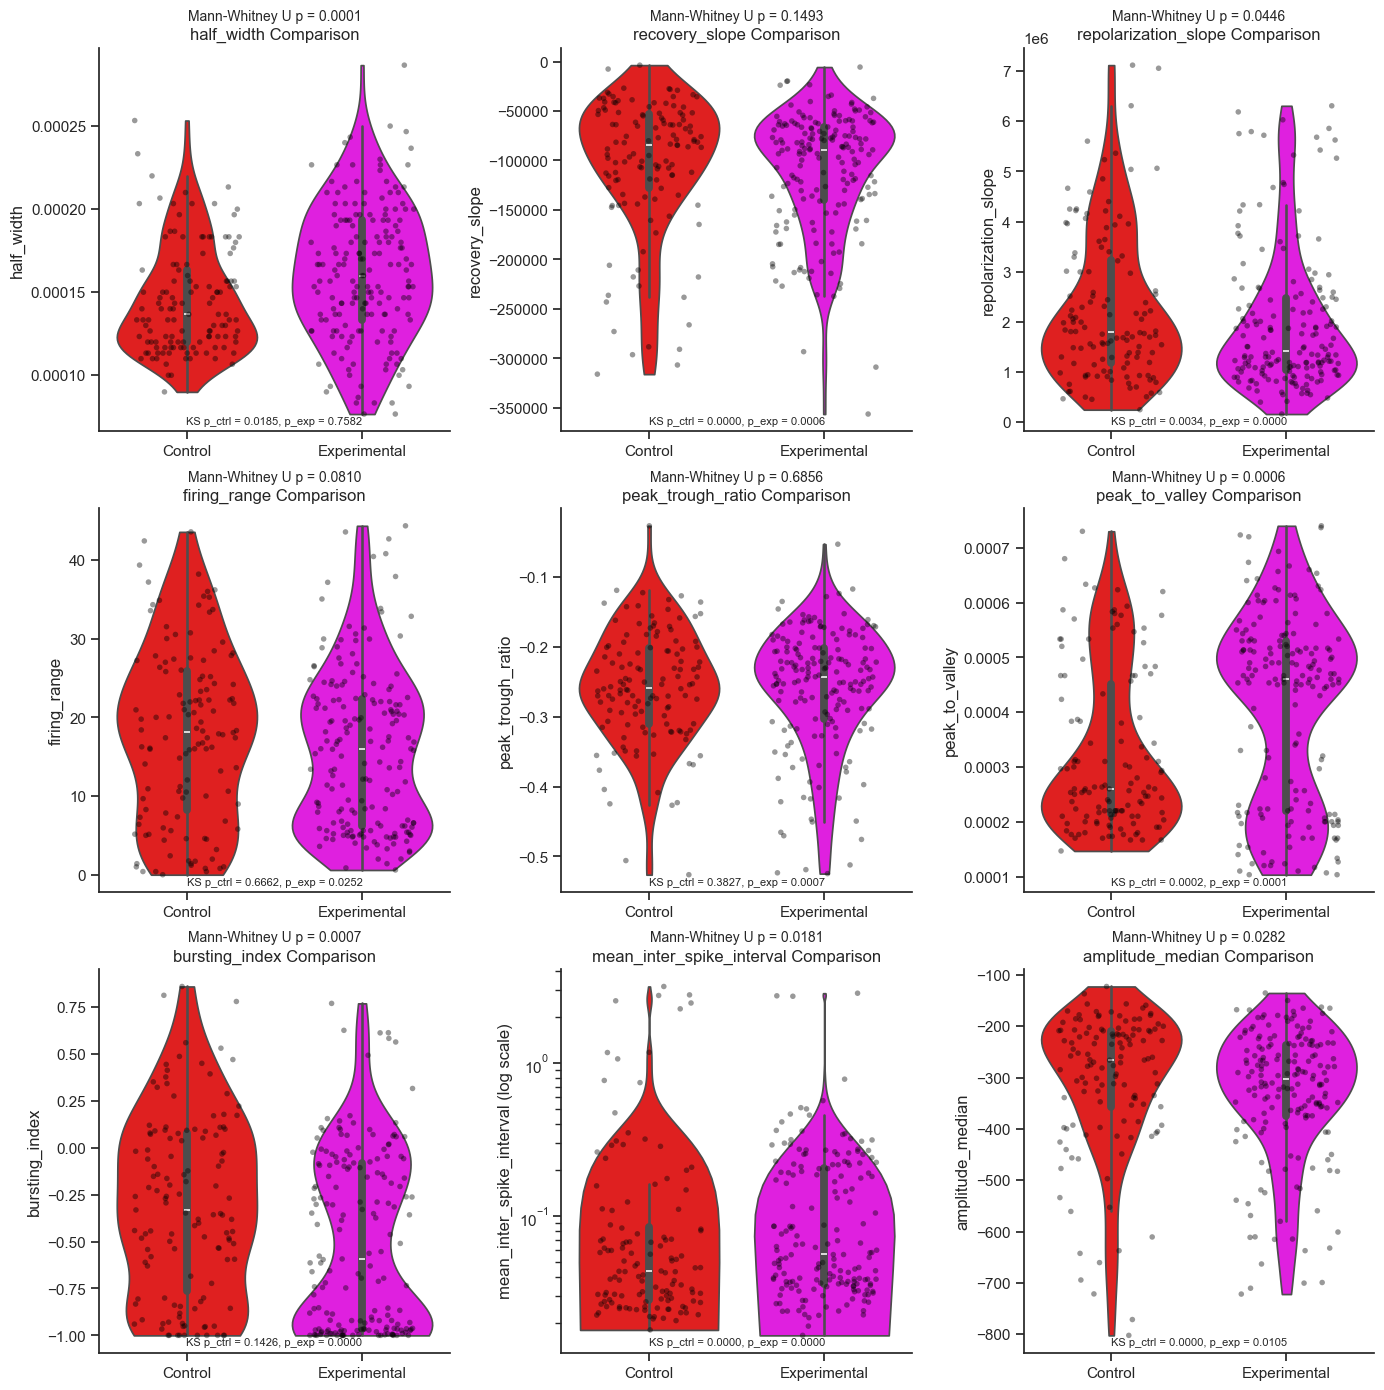

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
##Load Good units

df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements.pkl')
len(df_loaded)
df_good = df_loaded[df_loaded['unit_quality']=="good"]
df_py = df_good[df_good['cell_type']=="interneuron"]
df=df_py


base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/cell_type"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

session = ["A","B","C","Total"]

for session in session:
    # Filter for 'A' sessions
    if session == "Total":
        df_a = df
    else:
        df_a = df[df['session'] == session]

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

    # Set Seaborn theme
    sns.set_theme(style="ticks")

    # Statistical comparisons for scalar metrics
    metrics = ['half_width', 'recovery_slope', 'repolarization_slope', 
            'firing_range', 'peak_trough_ratio', 'peak_to_valley', 'bursting_index',"mean_inter_spike_interval", 'amplitude_median']

    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(3, 3, figsize=(14, 14))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Define custom colors
    control_color = "red"  # Dark blue for Control
    #exp_color = sns.color_palette(palette='gist_rainbow')[3]       # Light blue for Experimental
    exp_color = "magenta"
    for idx, metric in enumerate(metrics):
        control_values = control_df[metric].dropna()
        exp_values = exp_df[metric].dropna()
        
        if len(control_values) > 0 and len(exp_values) > 0:
            control_mean = control_values.mean()
            exp_mean = exp_values.mean()
            control_sem = control_values.sem()
            exp_sem = exp_values.sem()
            
            print(f"\nComparison for {metric}:")
            print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
            print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")
            
            control_ks_stat, control_ks_p = stats.kstest(control_values, 'norm', 
                                                            args=(control_mean, control_values.std()))
            exp_ks_stat, exp_ks_p = stats.kstest(exp_values, 'norm', 
                                                    args=(exp_mean, exp_values.std()))
            normal = control_ks_p > 0.05 and exp_ks_p > 0.05

            # Homoscedasticity test (Levene’s test)
            levene_stat, levene_p = stats.levene(control_values, exp_values)
            homoscedastic = levene_p > 0.05

            # Choose statistical test based on normality and homoscedasticity
            if normal and homoscedastic:
                # Use t-test
                t_stat, p_val = stats.ttest_ind(control_values, exp_values, equal_var=True)
                test_name = "t-test"
                print(f"T-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
            else:
                # Use Mann-Whitney U test
                u_stat, p_val = stats.mannwhitneyu(control_values, exp_values, alternative='two-sided')
                test_name = "Mann-Whitney U"
                print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")

            
            # Prepare data for Seaborn plotting
            plot_df = pd.DataFrame({
                'value': pd.concat([control_values, exp_values]),
                'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
            })
            
            # Check if deviation is "too large" (using coefficient of variation > 1 as threshold)
            all_values = plot_df['value']
            cv = all_values.std() / all_values.mean()  # Coefficient of variation
            use_log_scale = cv > 1 and all_values.min() > 0  # Ensure positive values for log scale
            
            # Filter out outliers (e.g., beyond 3 standard deviations)
            mean_val = all_values.mean()
            std_val = all_values.std()
            plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                    (plot_df['value'] <= mean_val + 3 * std_val)]
            
            # Create violin plot on the specific subplot
            violin = sns.violinplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                palette={"Control": control_color, "Experimental": exp_color},
                width=0.8,
                cut=0  # Prevents violin tails from extending beyond data range
            )
            
            # Set alpha (transparency) for the violin plot
            for patch in violin.collections:
                patch.set_alpha(1)
            
            # Add individual points with matching colors
            sns.stripplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                size=4,
                hue='group',
                palette={"Control": "black", "Experimental": "black"},
                alpha=0.4,
                jitter=0.3,
                legend=False
            )
            
            # Set title and labels
            axes[idx].set_title(f'{metric} Comparison')
            axes[idx].set_ylabel(metric)
            axes[idx].set_xlabel('Group')
            axes[idx].yaxis.grid(False)
            axes[idx].set(xlabel="")
            
            # Apply log scale if deviation is too large
            if use_log_scale:
                axes[idx].set_yscale('log')
                axes[idx].set_ylabel(f'{metric} (log scale)')

            axes[idx].text(0.5, 0.04, f'KS p_ctrl = {control_ks_p:.4f}, p_exp = {exp_ks_p:.4f}', 
                horizontalalignment='center', verticalalignment='top', 
                transform=axes[idx].transAxes, fontsize=8)
            
            # Add p-value at the top of the plot
            axes[idx].text(0.5, 1.1, f'{test_name} p = {p_val:.4f}', 
                            horizontalalignment='center', verticalalignment='top', 
                            transform=axes[idx].transAxes, fontsize=10)
            # # Add p-value at the top of the plot
            # axes[idx].text(0.5, 0.95, f'p = {p_val:.4f}', 
            #             horizontalalignment='center', 
            #             verticalalignment='top', 
            #             transform=axes[idx].transAxes, 
            #             fontsize=10)
            
            # Remove top and right spines, keep bottom (x) and left (y) axes
            axes[idx].spines['top'].set_visible(False)
            axes[idx].spines['right'].set_visible(False)
            axes[idx].spines['bottom'].set_visible(True)
            axes[idx].spines['left'].set_visible(True)

    # Save the figure
    fig.savefig(fr'{base_folder}/{session}_waveforms_interneuron.eps', format='eps', bbox_inches='tight')
    fig.savefig(fr'{base_folder}/{session}_waveforms_interneuron.png', format='png', bbox_inches='tight')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: 0.63, p-value: 0.5350

Comparison for recovery_slope:
Control mean: -100605.33 ± 17166.66
Experimental mean: -132398.33 ± 14083.70
T-test statistic: 1.38, p-value: 0.1800

Comparison for repolarization_slope:
Control mean: 1122490.93 ± 125214.66
Experimental mean: 1539246.80 ± 148730.92
T-test statistic: -1.85, p-value: 0.0753

Comparison for firing_range:
Control mean: 6.15 ± 0.58
Experimental mean: 5.73 ± 0.47
T-test statistic: 0.54, p-value: 0.5951

Comparison for peak_trough_ratio:
Control mean: -0.23 ± 0.01
Experimental mean: -0.24 ± 0.01
T-test statistic: 0.18, p-value: 0.8617


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov


Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: 0.54, p-value: 0.5960

Comparison for bursting_index:
Control mean: 0.04 ± 0.02
Experimental mean: 0.01 ± 0.01
Mann-Whitney U statistic: 143.00, p-value: 0.0282


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(



Comparison for mean_inter_spike_interval:
Control mean: 0.23 ± 0.03
Experimental mean: 0.28 ± 0.04
T-test statistic: -0.84, p-value: 0.4079


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


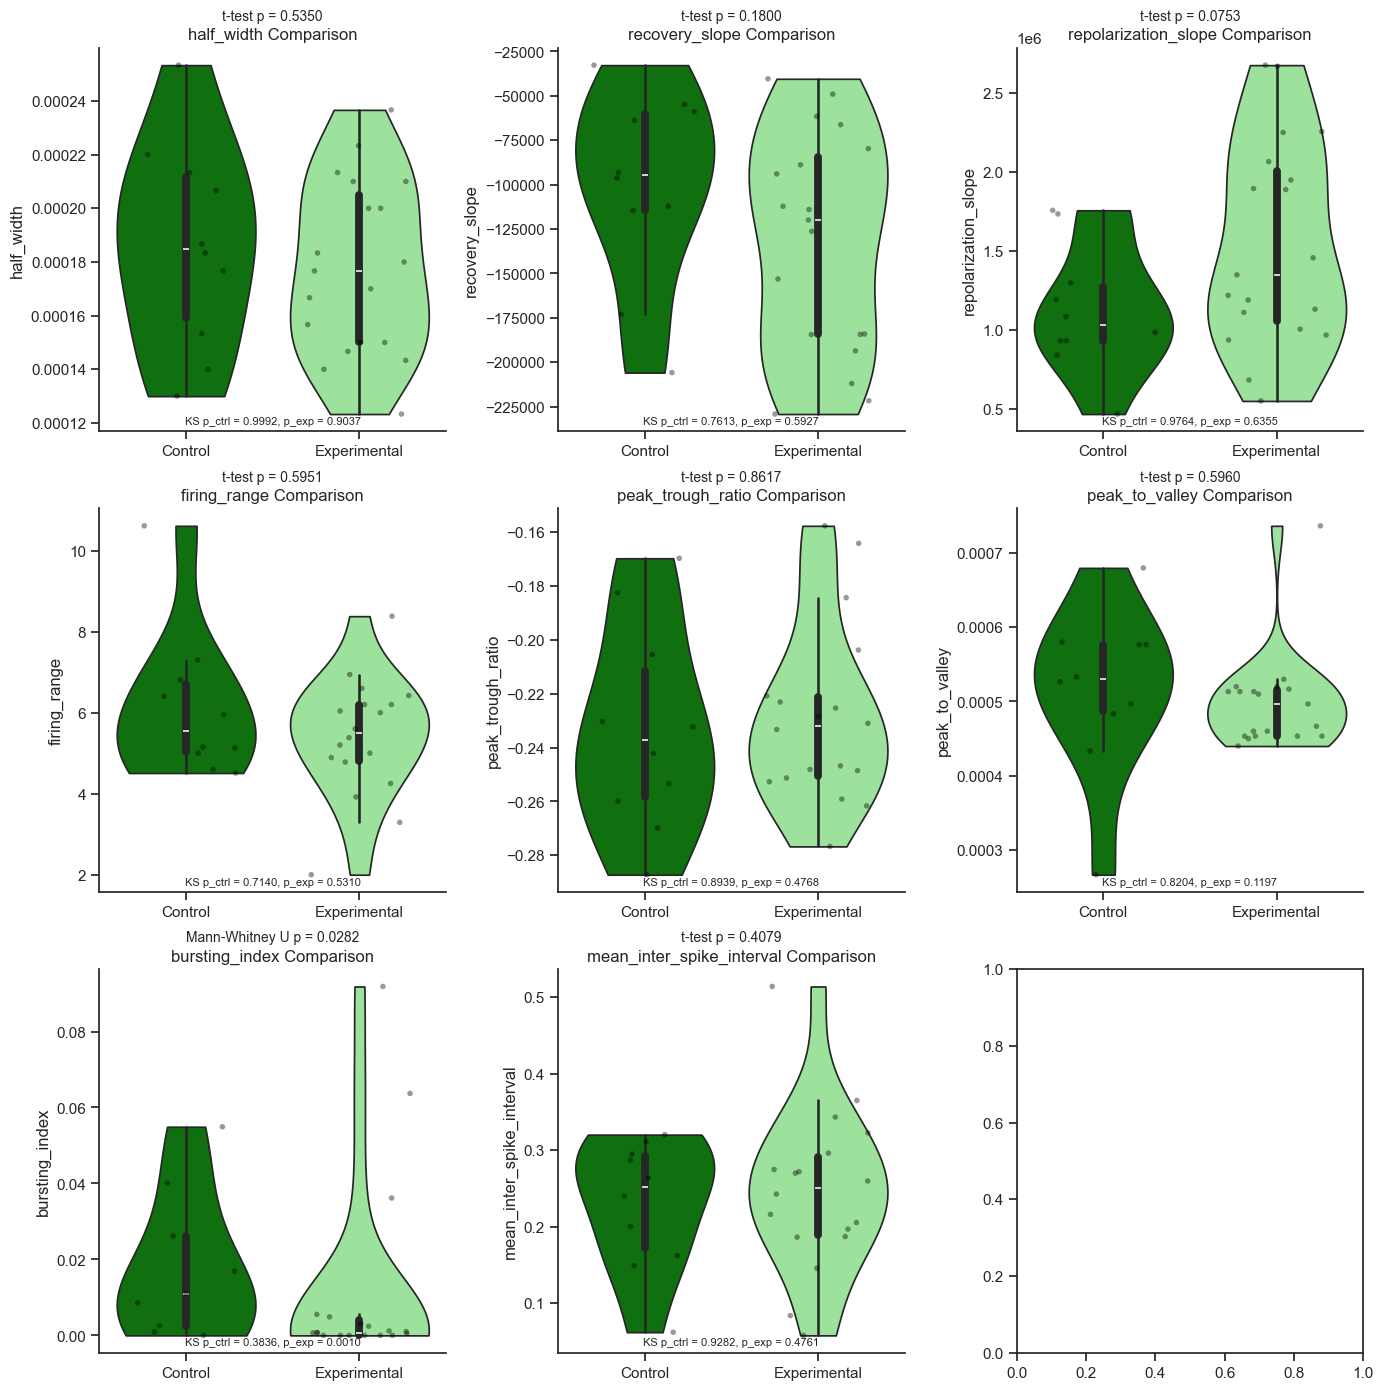


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: -0.64, p-value: 0.5277

Comparison for recovery_slope:
Control mean: -139400.16 ± 29943.84
Experimental mean: -126998.28 ± 13210.56
T-test statistic: -0.44, p-value: 0.6621

Comparison for repolarization_slope:
Control mean: 1144113.74 ± 81042.84
Experimental mean: 1448233.57 ± 154946.08
T-test statistic: -1.20, p-value: 0.2453

Comparison for firing_range:
Control mean: 5.29 ± 0.62
Experimental mean: 6.35 ± 0.66
T-test statistic: -0.94, p-value: 0.3580

Comparison for peak_trough_ratio:
Control mean: -0.26 ± 0.02
Experimental mean: -0.23 ± 0.01
T-test statistic: -1.15, p-value: 0.2648


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov


Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 66.50, p-value: 0.1012

Comparison for bursting_index:
Control mean: 0.03 ± 0.01
Experimental mean: 0.01 ± 0.01
Mann-Whitney U statistic: 74.00, p-value: 0.0263

Comparison for mean_inter_spike_interval:
Control mean: 0.47 ± 0.15
Experimental mean: 0.25 ± 0.02
Mann-Whitney U statistic: 62.00, p-value: 0.2051


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


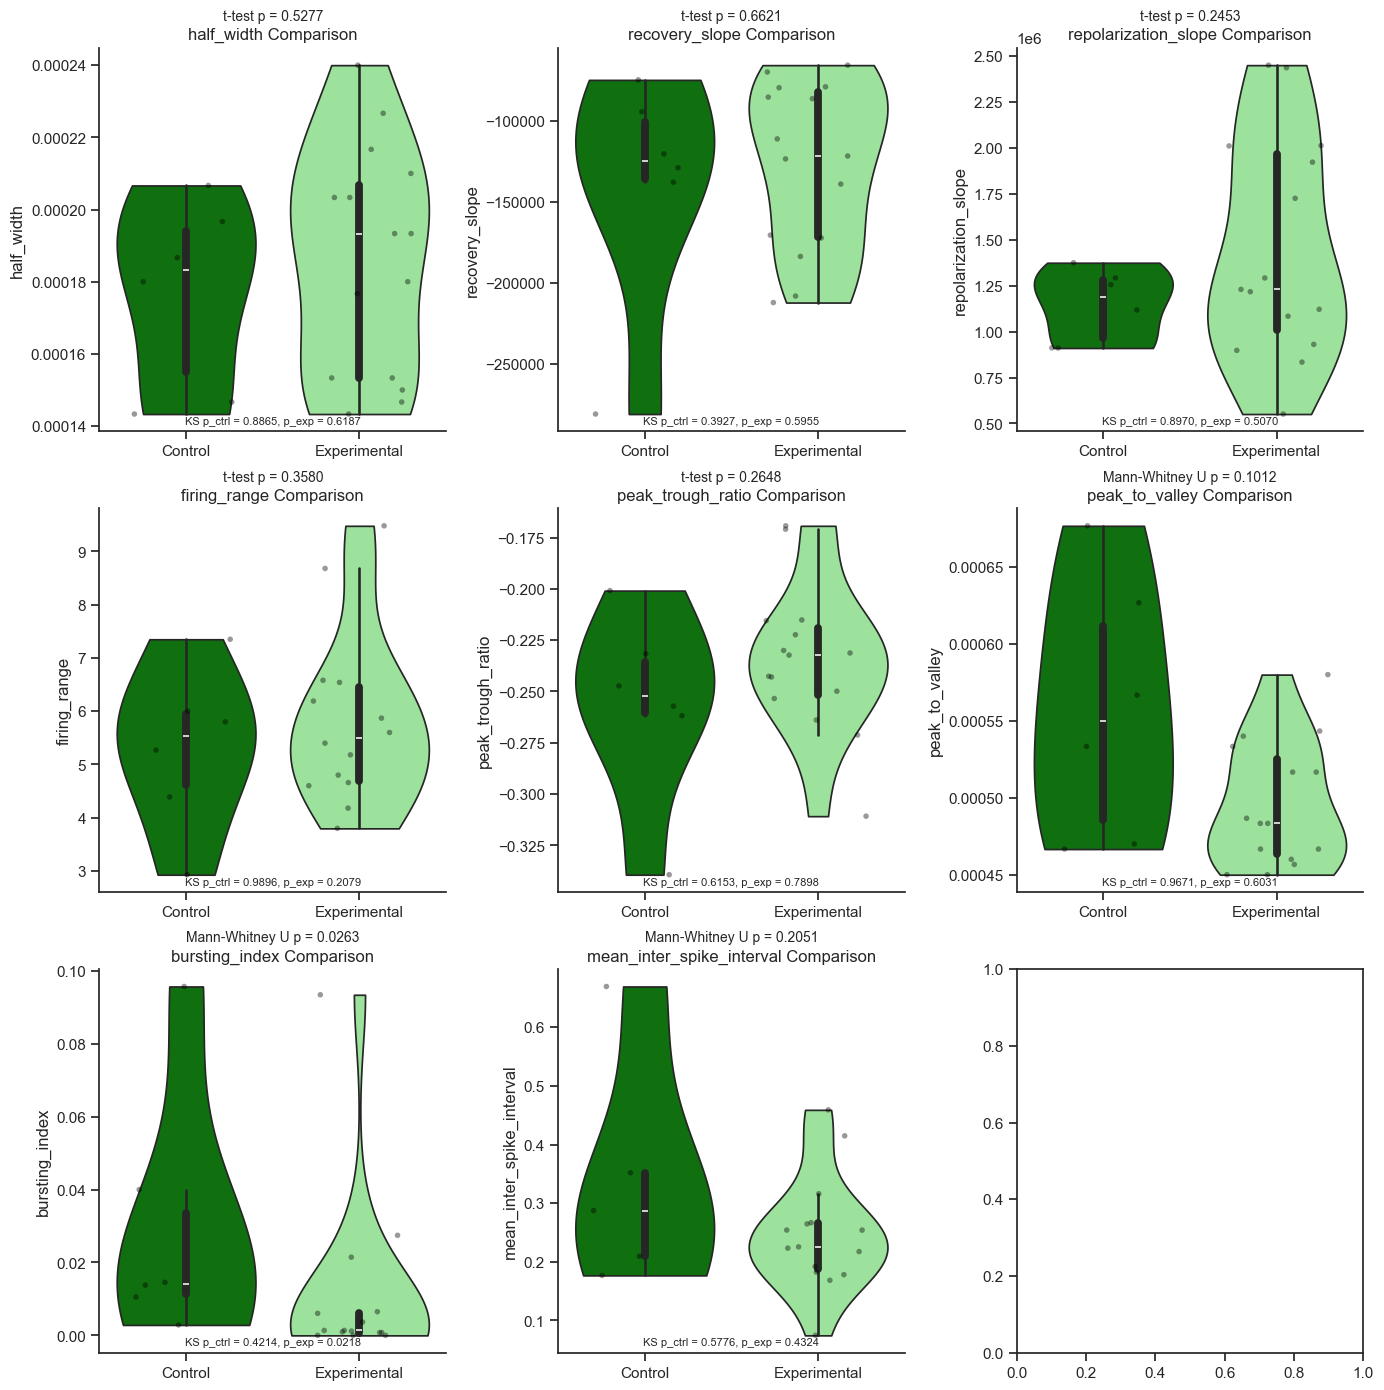


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: 1.16, p-value: 0.2602

Comparison for recovery_slope:
Control mean: -111912.69 ± 26040.96
Experimental mean: -125250.91 ± 13032.68
T-test statistic: 0.50, p-value: 0.6197

Comparison for repolarization_slope:
Control mean: 1057372.51 ± 173908.88
Experimental mean: 1479162.56 ± 142597.68
T-test statistic: -1.64, p-value: 0.1171

Comparison for firing_range:
Control mean: 5.72 ± 1.07
Experimental mean: 5.29 ± 0.43
T-test statistic: 0.45, p-value: 0.6599

Comparison for peak_trough_ratio:
Control mean: -0.29 ± 0.05
Experimental mean: -0.23 ± 0.01
Mann-Whitney U statistic: 31.00, p-value: 0.2308


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov


Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 62.00, p-value: 0.3188

Comparison for bursting_index:
Control mean: 0.06 ± 0.03
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 66.00, p-value: 0.1965

Comparison for mean_inter_spike_interval:
Control mean: 0.67 ± 0.37
Experimental mean: 0.29 ± 0.03
T-test statistic: 1.73, p-value: 0.0991


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


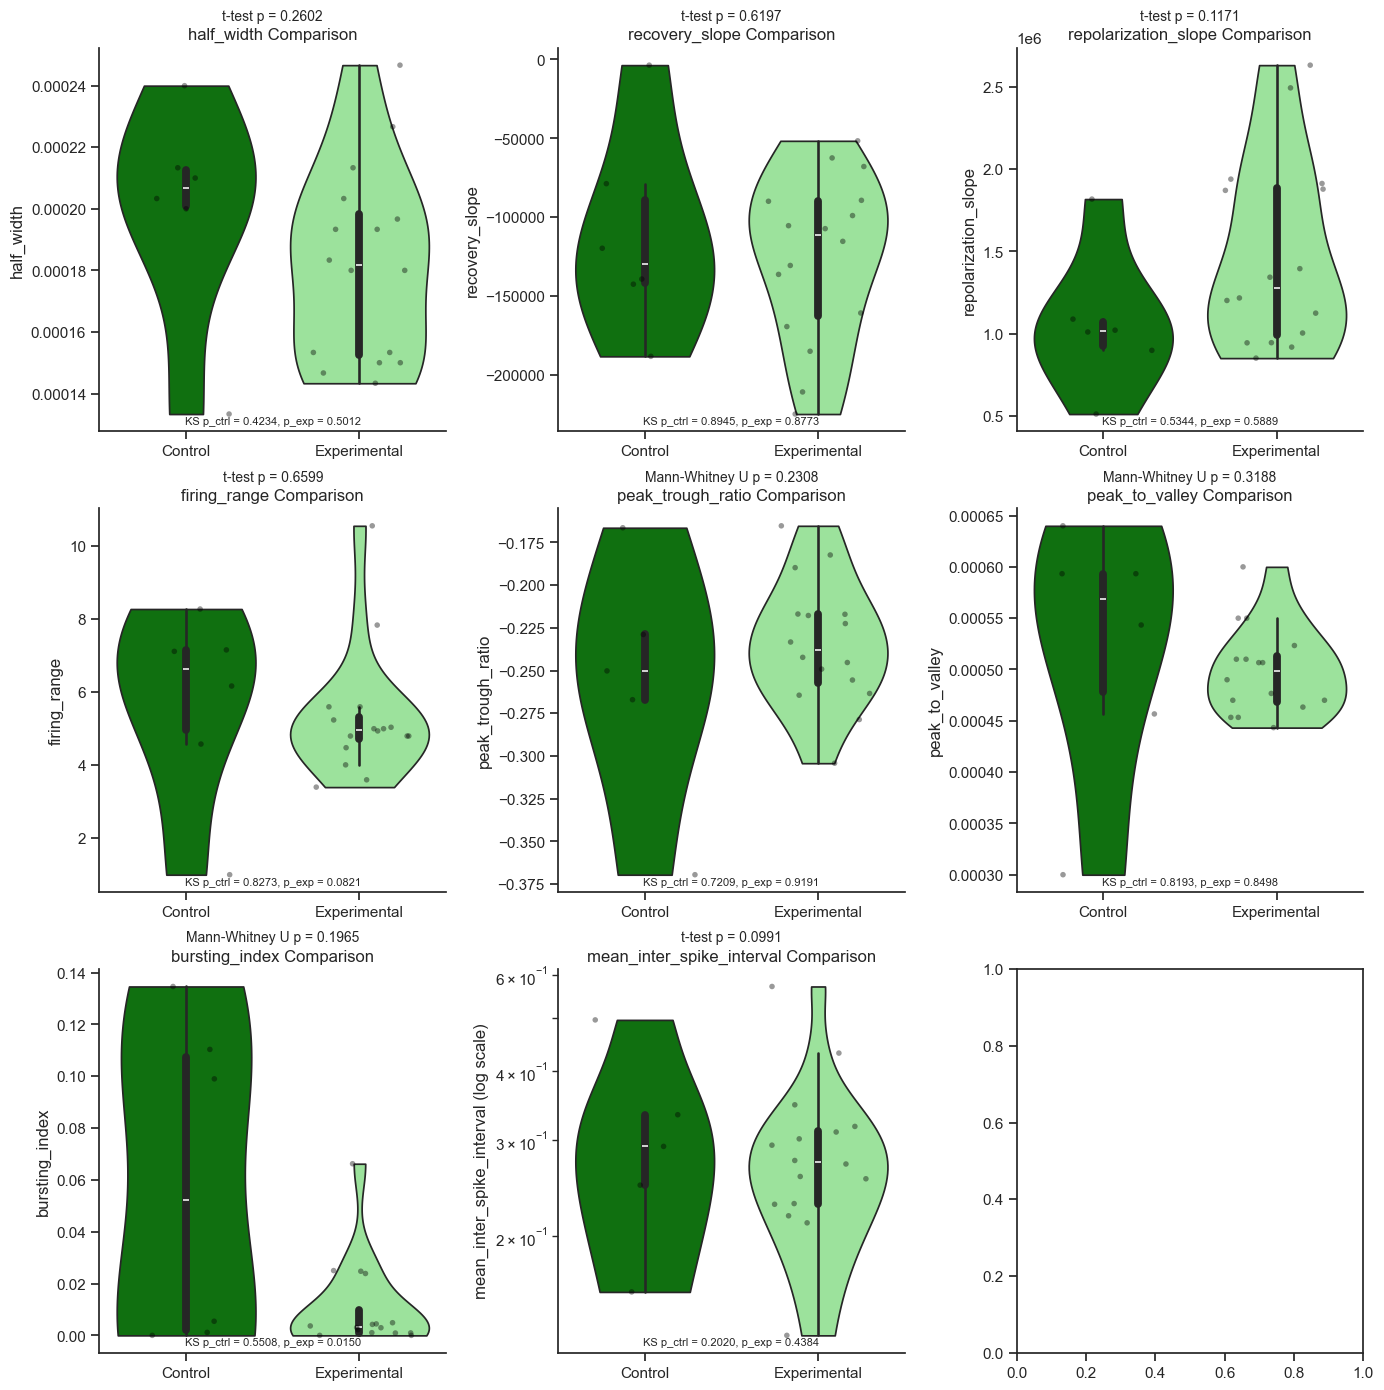


Comparison for half_width:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
T-test statistic: 0.70, p-value: 0.4855

Comparison for recovery_slope:
Control mean: -114269.56 ± 13114.15
Experimental mean: -128491.14 ± 7712.71
T-test statistic: 0.98, p-value: 0.3304

Comparison for repolarization_slope:
Control mean: 1110628.49 ± 74156.19
Experimental mean: 1492715.87 ± 84662.65
Mann-Whitney U statistic: 340.00, p-value: 0.0104

Comparison for firing_range:
Control mean: 5.80 ± 0.41
Experimental mean: 5.78 ± 0.30
T-test statistic: 0.04, p-value: 0.9700

Comparison for peak_trough_ratio:
Control mean: -0.26 ± 0.01
Experimental mean: -0.24 ± 0.01
T-test statistic: -1.63, p-value: 0.1072


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov


Comparison for peak_to_valley:
Control mean: 0.00 ± 0.00
Experimental mean: 0.00 ± 0.00
Mann-Whitney U statistic: 749.50, p-value: 0.0149

Comparison for bursting_index:
Control mean: 0.04 ± 0.01
Experimental mean: 0.01 ± 0.00
Mann-Whitney U statistic: 816.00, p-value: 0.0011

Comparison for mean_inter_spike_interval:
Control mean: 0.42 ± 0.11
Experimental mean: 0.27 ± 0.02
Mann-Whitney U statistic: 612.00, p-value: 0.4522


C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\sachur\AppData\Local\Temp\ipykernel_17152\3684489855.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


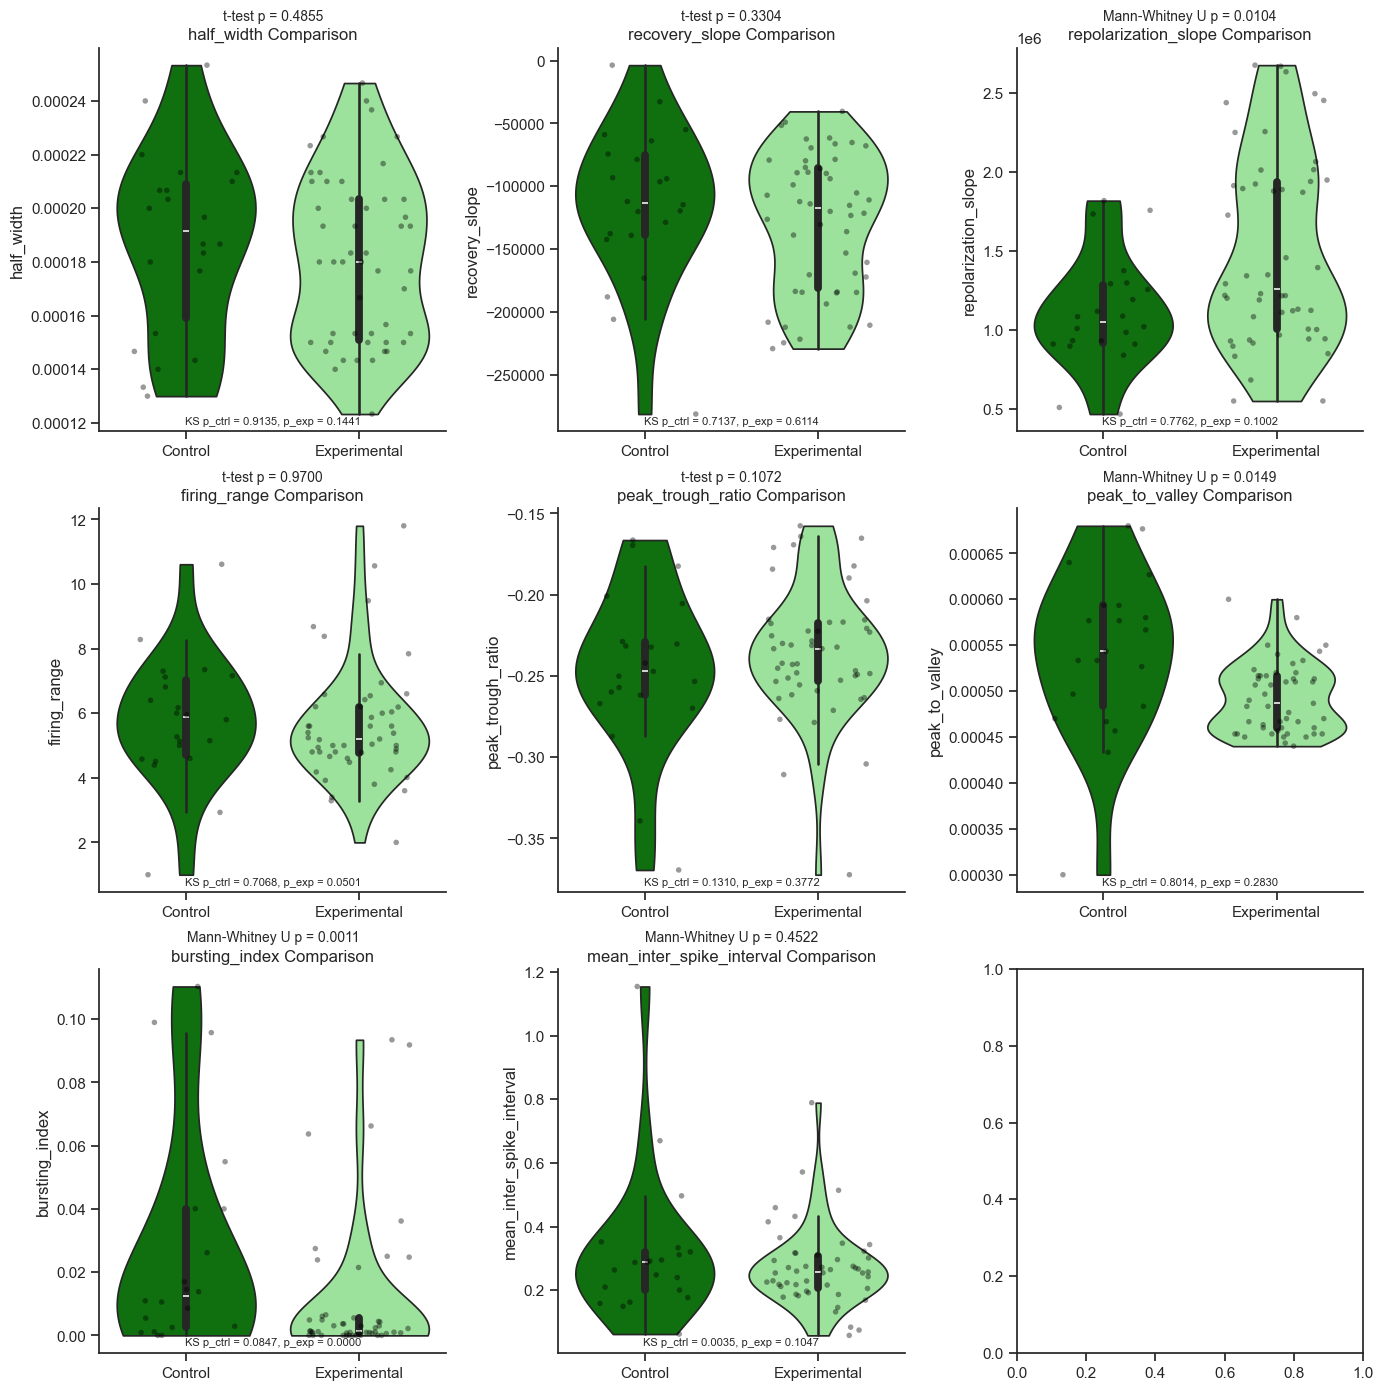

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
##Load Good units

df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements.pkl')
len(df_loaded)
df_good = df_loaded[df_loaded['unit_quality']=="good"]
df_py = df_good[df_good['cell_type']=="wid_interneuron?"]
df=df_py


base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/cell_type"

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

session = ["A","B","C","Total"]

for session in session:
    # Filter for 'A' sessions
    if session == "Total":
        df_a = df
    else:
        df_a = df[df['session'] == session]

    # Separate into control and experimental groups
    control_df = df_a[df_a['animal_id'].isin(control_ids)]
    exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

    # Set Seaborn theme
    sns.set_theme(style="ticks")

    # Statistical comparisons for scalar metrics
    metrics = ['half_width', 'recovery_slope', 'repolarization_slope', 
            'firing_range', 'peak_trough_ratio', 'peak_to_valley', 'bursting_index',"mean_inter_spike_interval"]

    # Create figure with 3x2 subplots
    fig, axes = plt.subplots(3, 3, figsize=(14, 14))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Define custom colors
    control_color = "green"  # Changed from red to green
    exp_color = "lightgreen"  # Changed from magenta to lightgreen
    
    for idx, metric in enumerate(metrics):
        control_values = control_df[metric].dropna()
        exp_values = exp_df[metric].dropna()
        
        if len(control_values) > 0 and len(exp_values) > 0:
            control_mean = control_values.mean()
            exp_mean = exp_values.mean()
            control_sem = control_values.sem()
            exp_sem = exp_values.sem()
            
            print(f"\nComparison for {metric}:")
            print(f"Control mean: {control_mean:.2f} ± {control_sem:.2f}")
            print(f"Experimental mean: {exp_mean:.2f} ± {exp_sem:.2f}")
            
            control_ks_stat, control_ks_p = stats.kstest(control_values, 'norm', 
                                                            args=(control_mean, control_values.std()))
            exp_ks_stat, exp_ks_p = stats.kstest(exp_values, 'norm', 
                                                    args=(exp_mean, exp_values.std()))
            normal = control_ks_p > 0.05 and exp_ks_p > 0.05

            # Homoscedasticity test (Levene’s test)
            levene_stat, levene_p = stats.levene(control_values, exp_values)
            homoscedastic = levene_p > 0.05

            # Choose statistical test based on normality and homoscedasticity
            if normal and homoscedastic:
                # Use t-test
                t_stat, p_val = stats.ttest_ind(control_values, exp_values, equal_var=True)
                test_name = "t-test"
                print(f"T-test statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
            else:
                # Use Mann-Whitney U test
                u_stat, p_val = stats.mannwhitneyu(control_values, exp_values, alternative='two-sided')
                test_name = "Mann-Whitney U"
                print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.4f}")

            
            # Prepare data for Seaborn plotting
            plot_df = pd.DataFrame({
                'value': pd.concat([control_values, exp_values]),
                'group': ['Control'] * len(control_values) + ['Experimental'] * len(exp_values)
            })
            
            # Check if deviation is "too large" (using coefficient of variation > 1 as threshold)
            all_values = plot_df['value']
            cv = all_values.std() / all_values.mean()  # Coefficient of variation
            use_log_scale = cv > 1 and all_values.min() > 0  # Ensure positive values for log scale
            
            # Filter out outliers (e.g., beyond 3 standard deviations)
            mean_val = all_values.mean()
            std_val = all_values.std()
            plot_df_filtered = plot_df[(plot_df['value'] >= mean_val - 3 * std_val) & 
                                    (plot_df['value'] <= mean_val + 3 * std_val)]
            
            # Create violin plot on the specific subplot
            violin = sns.violinplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                palette={"Control": control_color, "Experimental": exp_color},
                width=0.8,
                cut=0  # Prevents violin tails from extending beyond data range
            )
            
            # Set alpha (transparency) for the violin plot
            for patch in violin.collections:
                patch.set_alpha(1)
            
            # Add individual points with matching colors
            sns.stripplot(
                data=plot_df_filtered,
                x='group',
                y='value',
                ax=axes[idx],
                size=4,
                hue='group',
                palette={"Control": "black", "Experimental": "black"},
                alpha=0.4,
                jitter=0.3,
                legend=False
            )
            
            # Set title and labels
            axes[idx].set_title(f'{metric} Comparison')
            axes[idx].set_ylabel(metric)
            axes[idx].set_xlabel('Group')
            axes[idx].yaxis.grid(False)
            axes[idx].set(xlabel="")
            
            # Apply log scale if deviation is too large
            if use_log_scale:
                axes[idx].set_yscale('log')
                axes[idx].set_ylabel(f'{metric} (log scale)')

            axes[idx].text(0.5, 0.04, f'KS p_ctrl = {control_ks_p:.4f}, p_exp = {exp_ks_p:.4f}', 
                horizontalalignment='center', verticalalignment='top', 
                transform=axes[idx].transAxes, fontsize=8)
            
            # Add p-value at the top of the plot
            axes[idx].text(0.5, 1.1, f'{test_name} p = {p_val:.4f}', 
                            horizontalalignment='center', verticalalignment='top', 
                            transform=axes[idx].transAxes, fontsize=10)
            
            # Remove top and right spines, keep bottom (x) and left (y) axes
            axes[idx].spines['top'].set_visible(False)
            axes[idx].spines['right'].set_visible(False)
            axes[idx].spines['bottom'].set_visible(True)
            axes[idx].spines['left'].set_visible(True)

    # Save the figure
    fig.savefig(fr'{base_folder}/{session}_waveforms_wide_interneuron.eps', format='eps', bbox_inches='tight')
    fig.savefig(fr'{base_folder}/{session}_waveforms_wide_interneuron.png', format='png', bbox_inches='tight')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


A - half_width (after outlier removal):
Control: slope = -0.0000 ± 0.0000, R² = 0.0037, n = 88
Experimental: slope = 0.0000 ± 0.0000, R² = 0.0400, n = 46
Slope difference z-statistic: -1.4208, p-value: 0.1554

A - recovery_slope (after outlier removal):
Control: slope = -10561.8110 ± 13887.2597, R² = 0.0067, n = 88
Experimental: slope = -12539.8331 ± 13859.6561, R² = 0.0187, n = 45
Slope difference z-statistic: 0.1008, p-value: 0.9197

A - repolarization_slope (after outlier removal):
Control: slope = 65148.6709 ± 100894.9995, R² = 0.0051, n = 83
Experimental: slope = -20771.6318 ± 84488.1689, R² = 0.0015, n = 42
Slope difference z-statistic: 0.6529, p-value: 0.5138

A - firing_range (after outlier removal):
Control: slope = -1.5813 ± 0.6202, R² = 0.0688, n = 90
Experimental: slope = -1.4368 ± 0.7043, R² = 0.0847, n = 47
Slope difference z-statistic: -0.1540, p-value: 0.8776

A - peak_trough_ratio (after outlier removal):
Control: slope = 0.0097 ± 0.0095, R² = 0.0119, n = 89
Experimen

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


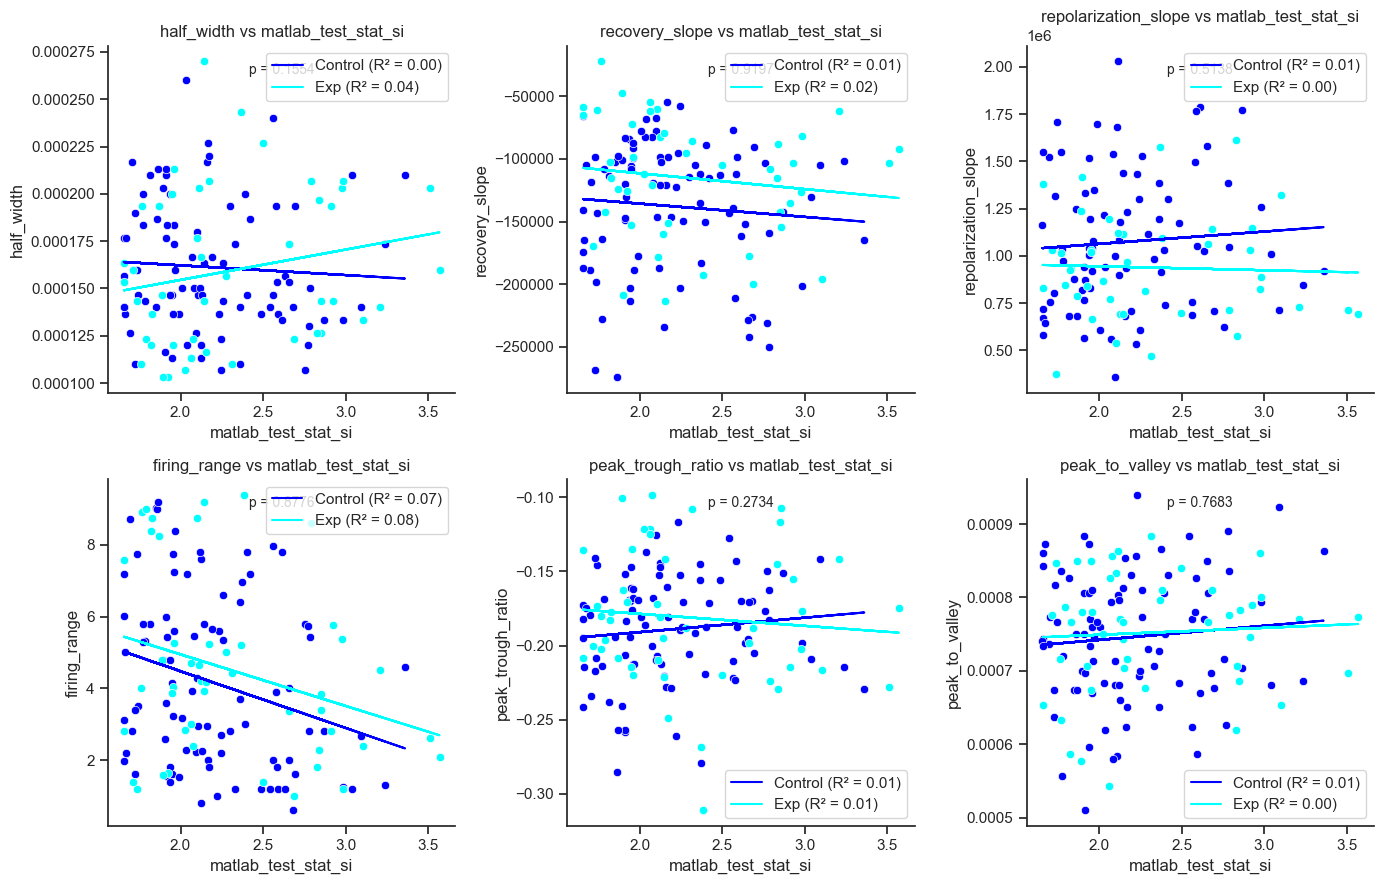


B - half_width (after outlier removal):
Control: slope = 0.0000 ± 0.0000, R² = 0.0005, n = 34
Experimental: slope = -0.0000 ± 0.0000, R² = 0.0180, n = 35
Slope difference z-statistic: 0.6038, p-value: 0.5459

B - recovery_slope (after outlier removal):
Control: slope = -25519.5334 ± 19334.5476, R² = 0.0549, n = 32
Experimental: slope = -5320.4365 ± 20994.8410, R² = 0.0019, n = 35
Slope difference z-statistic: -0.7077, p-value: 0.4791

B - repolarization_slope (after outlier removal):
Control: slope = -137347.3243 ± 233423.5655, R² = 0.0114, n = 32
Experimental: slope = 280338.7509 ± 243147.9544, R² = 0.0399, n = 34
Slope difference z-statistic: -1.2392, p-value: 0.2153

B - firing_range (after outlier removal):
Control: slope = 0.8465 ± 0.8579, R² = 0.0304, n = 33
Experimental: slope = -0.3813 ± 1.1885, R² = 0.0030, n = 36
Slope difference z-statistic: 0.8376, p-value: 0.4023

B - peak_trough_ratio (after outlier removal):
Control: slope = 0.0063 ± 0.0148, R² = 0.0061, n = 32
Experime

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


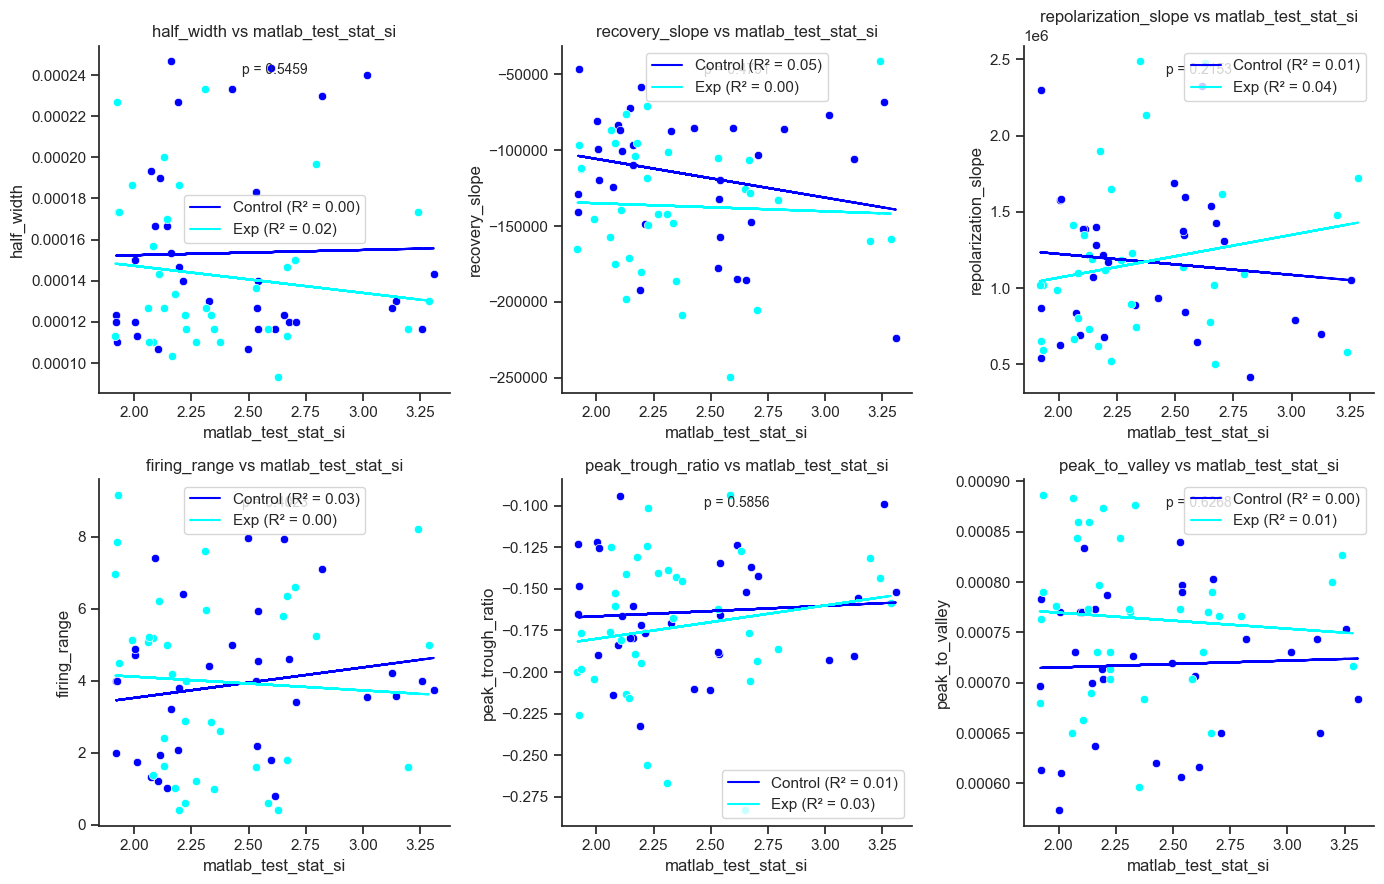


C - half_width (after outlier removal):
Control: slope = 0.0000 ± 0.0000, R² = 0.0219, n = 34
Experimental: slope = -0.0000 ± 0.0000, R² = 0.0598, n = 56
Slope difference z-statistic: 1.6993, p-value: 0.0893

C - recovery_slope (after outlier removal):
Control: slope = -9760.3467 ± 17865.8695, R² = 0.0099, n = 32
Experimental: slope = -38495.8154 ± 15126.6369, R² = 0.1071, n = 56
Slope difference z-statistic: 1.2275, p-value: 0.2196

C - repolarization_slope (after outlier removal):
Control: slope = 59555.0177 ± 219164.4153, R² = 0.0026, n = 30
Experimental: slope = 299962.4766 ± 124745.5844, R² = 0.0984, n = 55
Slope difference z-statistic: -0.9533, p-value: 0.3404

C - firing_range (after outlier removal):
Control: slope = -1.1903 ± 0.8844, R² = 0.0536, n = 34
Experimental: slope = -1.5712 ± 0.6087, R² = 0.1081, n = 57
Slope difference z-statistic: 0.3548, p-value: 0.7228

C - peak_trough_ratio (after outlier removal):
Control: slope = 0.0006 ± 0.0124, R² = 0.0001, n = 34
Experiment

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


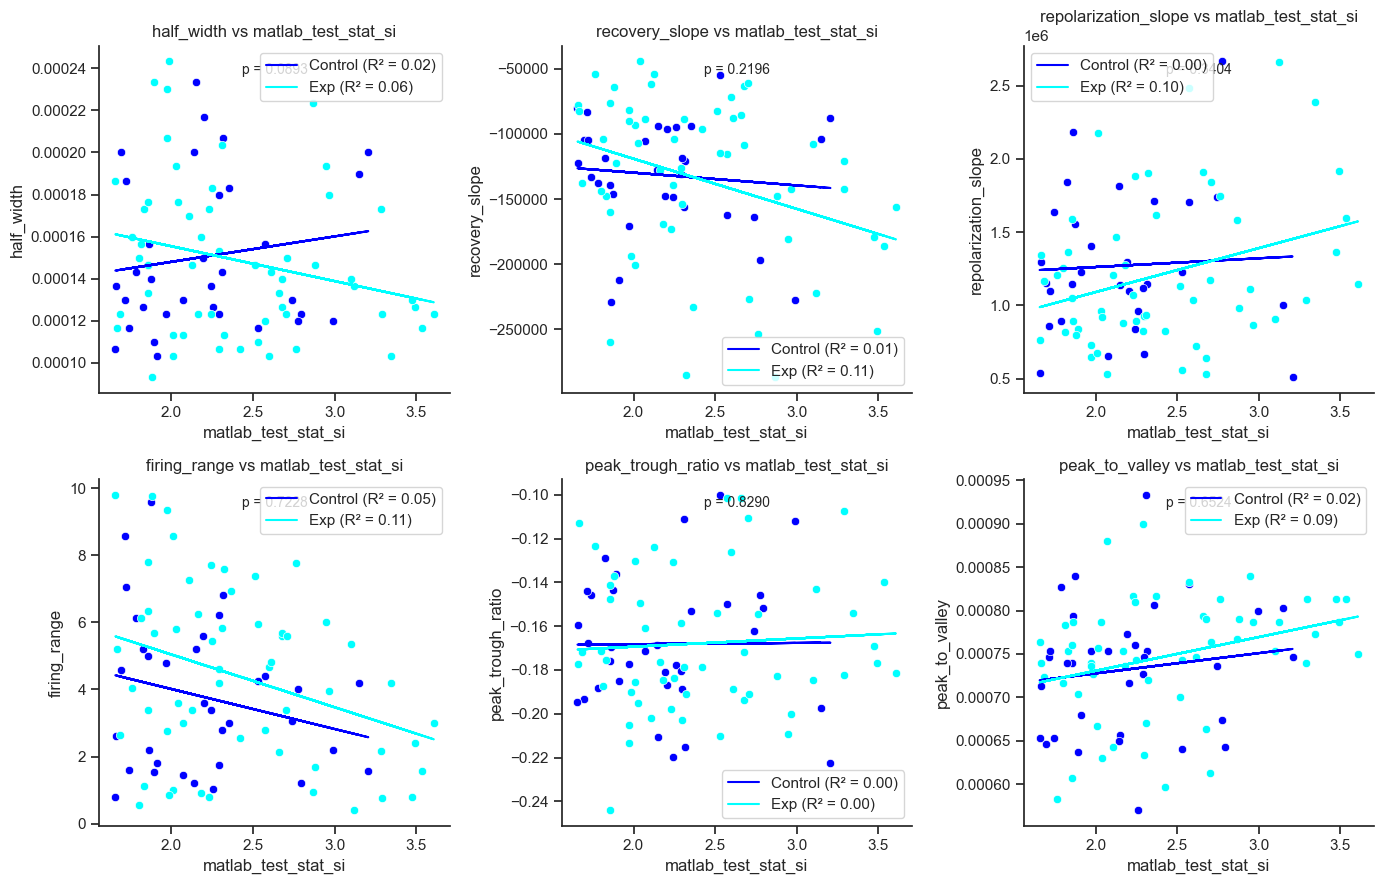


Total - half_width (after outlier removal):
Control: slope = 0.0000 ± 0.0000, R² = 0.0000, n = 157
Experimental: slope = -0.0000 ± 0.0000, R² = 0.0025, n = 137
Slope difference z-statistic: 0.3975, p-value: 0.6910

Total - recovery_slope (after outlier removal):
Control: slope = -13799.7846 ± 9170.6263, R² = 0.0151, n = 150
Experimental: slope = -19726.8536 ± 9265.3378, R² = 0.0327, n = 136
Slope difference z-statistic: 0.4547, p-value: 0.6494

Total - repolarization_slope (after outlier removal):
Control: slope = 43003.1957 ± 88078.8176, R² = 0.0017, n = 146
Experimental: slope = 86710.5959 ± 70529.3375, R² = 0.0119, n = 127
Slope difference z-statistic: -0.3873, p-value: 0.6985

Total - firing_range (after outlier removal):
Control: slope = -0.9885 ± 0.4382, R² = 0.0316, n = 158
Experimental: slope = -1.3439 ± 0.4266, R² = 0.0671, n = 140
Slope difference z-statistic: 0.5812, p-value: 0.5611

Total - peak_trough_ratio (after outlier removal):
Control: slope = 0.0074 ± 0.0071, R² = 0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


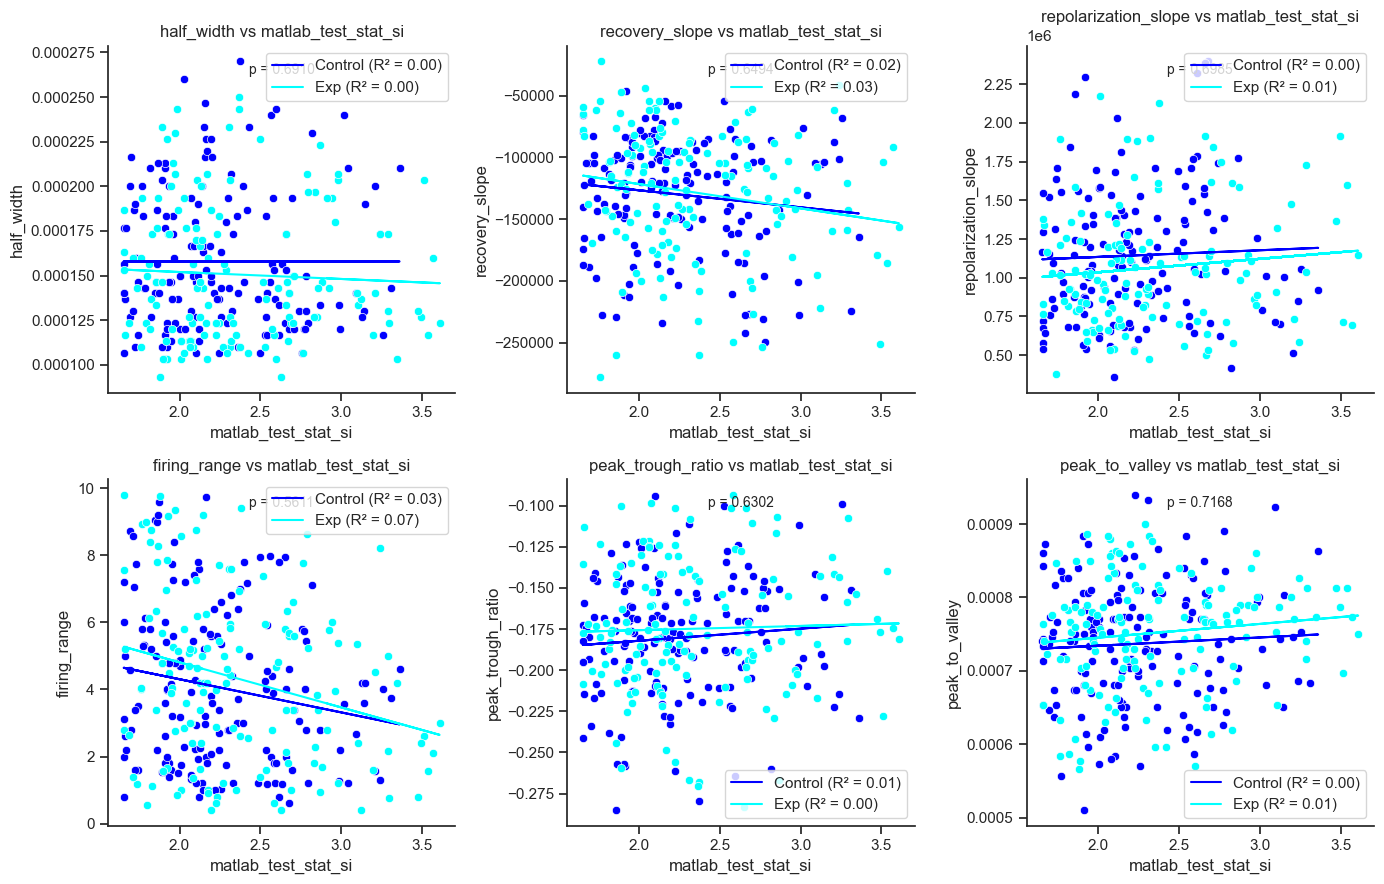


A - half_width (after outlier removal):
Control: slope = -0.0000 ± 0.0000, R² = 0.0018, n = 240
Experimental: slope = 0.0000 ± 0.0000, R² = 0.0077, n = 189
Slope difference z-statistic: -1.3370, p-value: 0.1812

A - recovery_slope (after outlier removal):
Control: slope = -27700.4482 ± 3560.6762, R² = 0.2055, n = 236
Experimental: slope = -16715.0277 ± 4588.5578, R² = 0.0666, n = 188
Slope difference z-statistic: -1.8914, p-value: 0.0586

A - repolarization_slope (after outlier removal):
Control: slope = 147081.3970 ± 30383.9091, R² = 0.0928, n = 231
Experimental: slope = 43533.2342 ± 39937.7685, R² = 0.0065, n = 185
Slope difference z-statistic: 2.0635, p-value: 0.0391

A - firing_range (after outlier removal):
Control: slope = -1.3282 ± 0.2712, R² = 0.0909, n = 242
Experimental: slope = -1.2038 ± 0.4346, R² = 0.0394, n = 189
Slope difference z-statistic: -0.2428, p-value: 0.8081

A - peak_trough_ratio (after outlier removal):
Control: slope = 0.0040 ± 0.0033, R² = 0.0061, n = 238
Ex

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


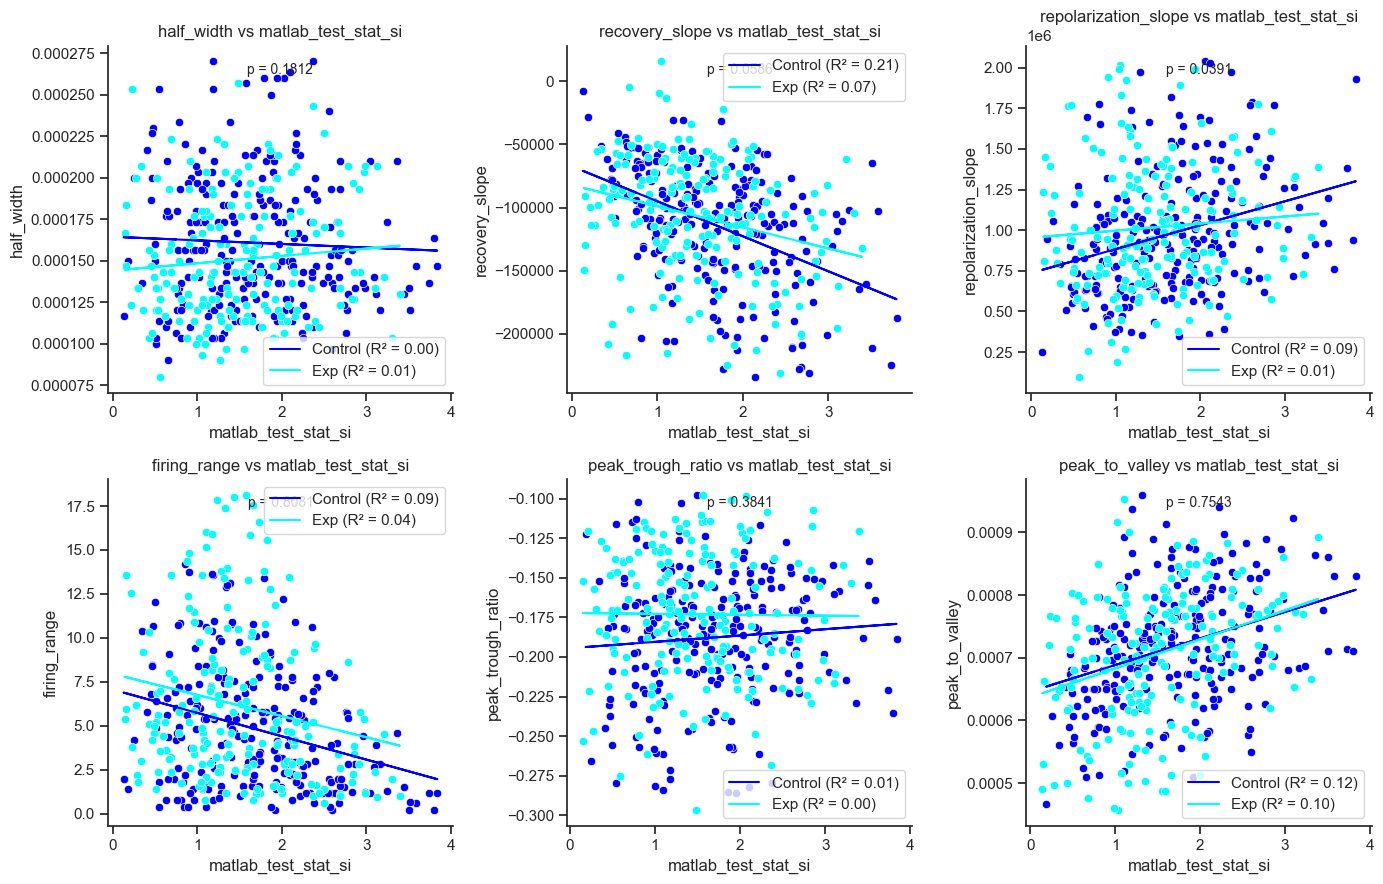


B - half_width (after outlier removal):
Control: slope = -0.0000 ± 0.0000, R² = 0.0003, n = 138
Experimental: slope = 0.0000 ± 0.0000, R² = 0.0021, n = 180
Slope difference z-statistic: -0.5983, p-value: 0.5496

B - recovery_slope (after outlier removal):
Control: slope = -15513.1910 ± 4065.4813, R² = 0.1007, n = 132
Experimental: slope = -27241.1119 ± 5007.3821, R² = 0.1454, n = 176
Slope difference z-statistic: 1.8183, p-value: 0.0690

B - repolarization_slope (after outlier removal):
Control: slope = 92230.6054 ± 44611.1511, R² = 0.0314, n = 134
Experimental: slope = 94825.4182 ± 49617.2490, R² = 0.0208, n = 174
Slope difference z-statistic: -0.0389, p-value: 0.9690

B - firing_range (after outlier removal):
Control: slope = -1.5687 ± 0.3334, R² = 0.1409, n = 137
Experimental: slope = -1.6152 ± 0.4460, R² = 0.0708, n = 174
Slope difference z-statistic: 0.0834, p-value: 0.9335

B - peak_trough_ratio (after outlier removal):
Control: slope = 0.0030 ± 0.0033, R² = 0.0065, n = 125
Expe

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


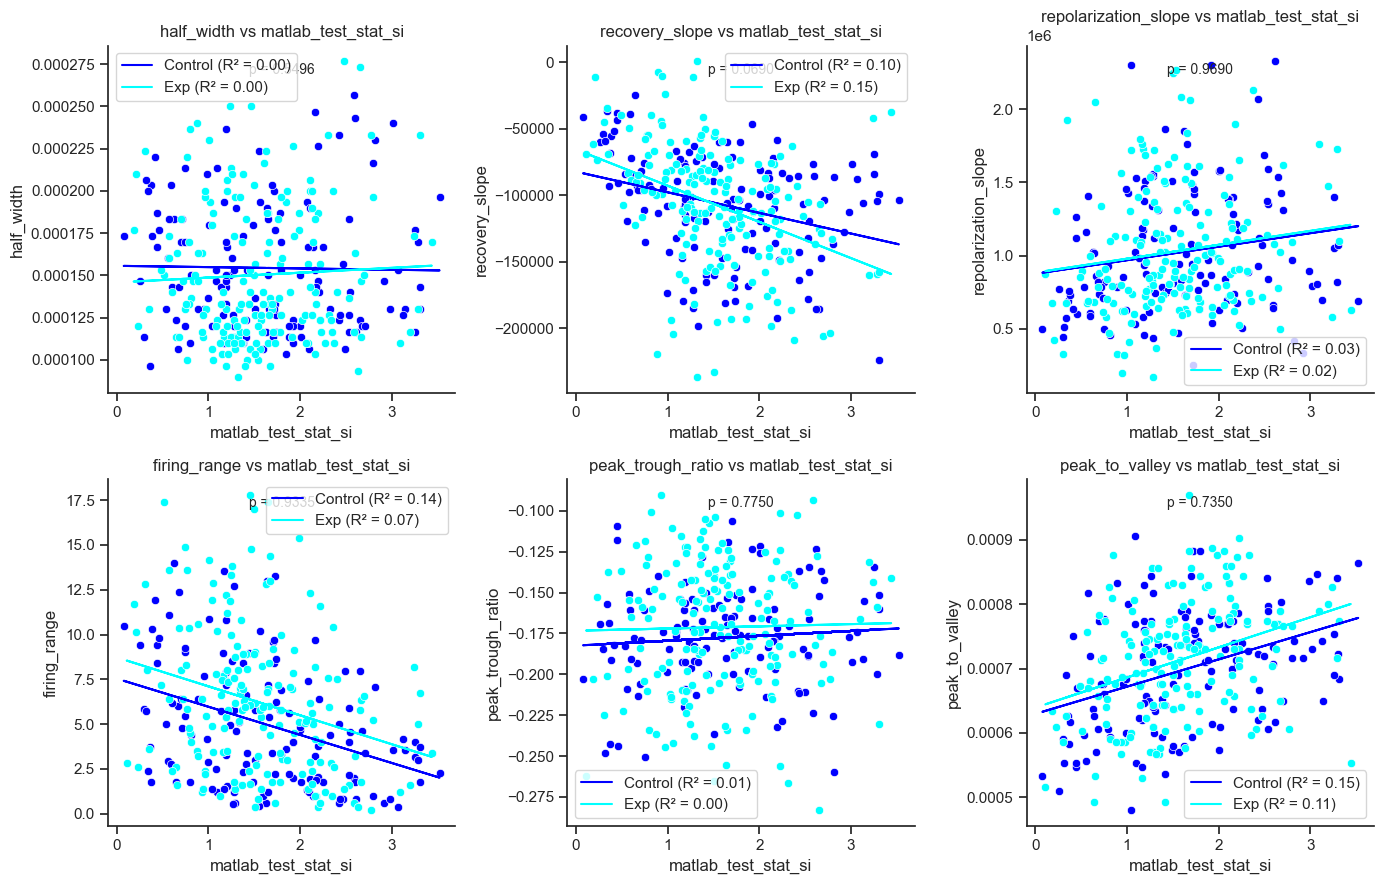


C - half_width (after outlier removal):
Control: slope = -0.0000 ± 0.0000, R² = 0.0102, n = 126
Experimental: slope = -0.0000 ± 0.0000, R² = 0.0033, n = 168
Slope difference z-statistic: -0.4102, p-value: 0.6817

C - recovery_slope (after outlier removal):
Control: slope = -23867.4248 ± 4252.0984, R² = 0.2093, n = 121
Experimental: slope = -26000.0815 ± 4188.6398, R² = 0.1971, n = 159
Slope difference z-statistic: 0.3573, p-value: 0.7209

C - repolarization_slope (after outlier removal):
Control: slope = 101124.2544 ± 41353.6363, R² = 0.0511, n = 113
Experimental: slope = 97207.9612 ± 41216.0332, R² = 0.0344, n = 158
Slope difference z-statistic: 0.0671, p-value: 0.9465

C - firing_range (after outlier removal):
Control: slope = -1.4460 ± 0.3491, R² = 0.1233, n = 124
Experimental: slope = -1.6308 ± 0.3644, R² = 0.1094, n = 165
Slope difference z-statistic: 0.3663, p-value: 0.7142

C - peak_trough_ratio (after outlier removal):
Control: slope = 0.0003 ± 0.0040, R² = 0.0000, n = 121
Exp

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


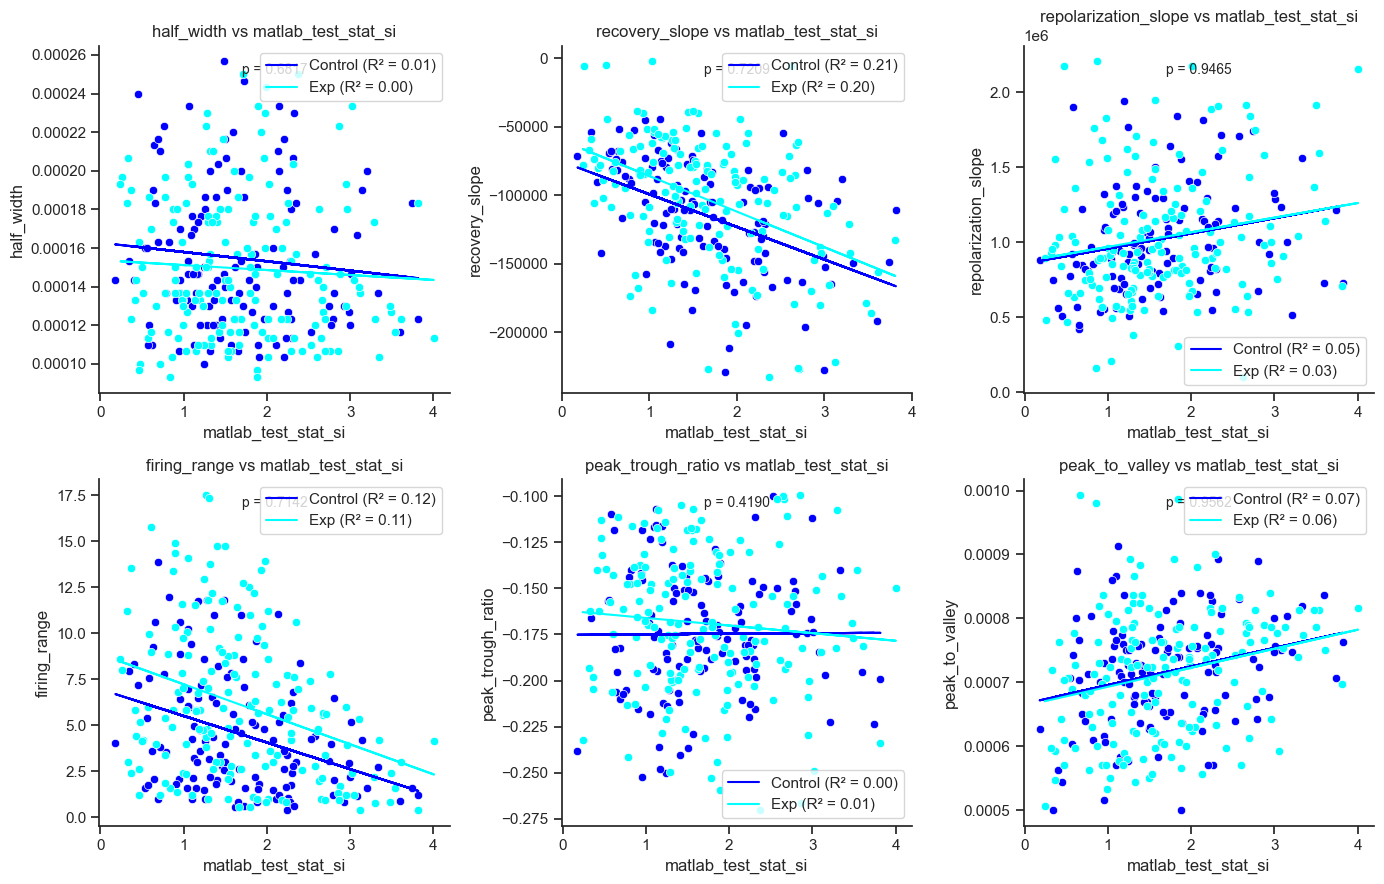


Total - half_width (after outlier removal):
Control: slope = -0.0000 ± 0.0000, R² = 0.0022, n = 504
Experimental: slope = 0.0000 ± 0.0000, R² = 0.0004, n = 538
Slope difference z-statistic: -1.0955, p-value: 0.2733

Total - recovery_slope (after outlier removal):
Control: slope = -23219.2491 ± 2292.6859, R² = 0.1740, n = 489
Experimental: slope = -22074.9900 ± 2591.2810, R² = 0.1216, n = 526
Slope difference z-statistic: -0.3307, p-value: 0.7409

Total - repolarization_slope (after outlier removal):
Control: slope = 119015.9579 ± 21330.3547, R² = 0.0615, n = 477
Experimental: slope = 69852.1744 ± 24640.4112, R² = 0.0153, n = 518
Slope difference z-statistic: 1.5085, p-value: 0.1314

Total - firing_range (after outlier removal):
Control: slope = -1.4404 ± 0.1814, R² = 0.1116, n = 504
Experimental: slope = -1.4624 ± 0.2345, R² = 0.0686, n = 530
Slope difference z-statistic: 0.0745, p-value: 0.9406

Total - peak_trough_ratio (after outlier removal):
Control: slope = 0.0030 ± 0.0022, R² =

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


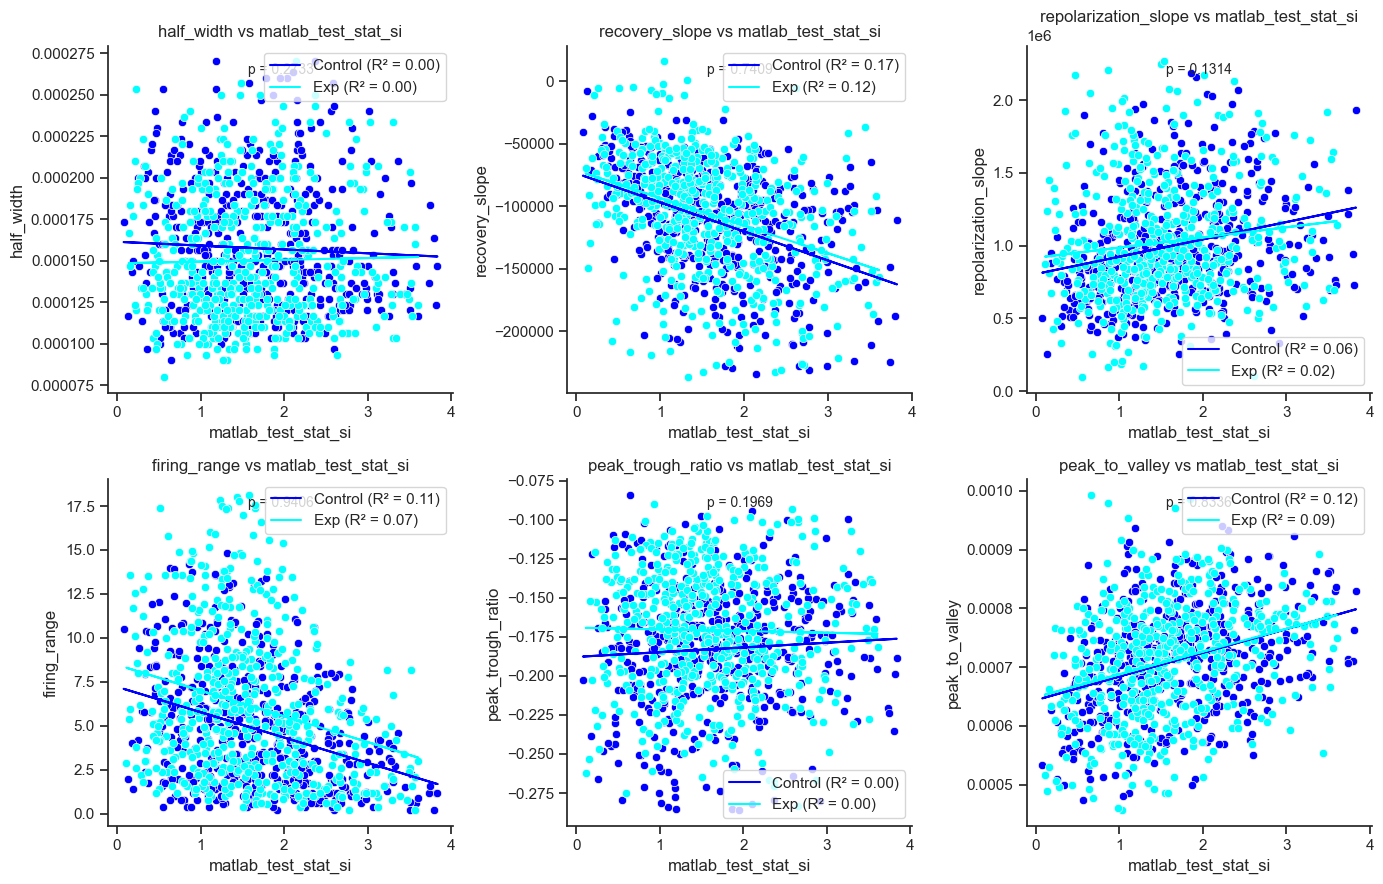

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements.pkl')
# [Previous data loading code remains the same until the session loop]
df_good = df_loaded[df_loaded['unit_quality']=="good"]
df_py = df_good[df_good['buzaki_py_cell_type']=="pyramidal"]

base_folder = r"Q:/sachuriga/CR_CA1_paper/Results/functional_cell_type"
control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

def remove_outliers(df, column):
    """Remove outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

funct = ["Place cells",""]


for functional_plot in funct:
    if functional_plot :
        df = df_py[df_py['functional_cell_type']=="Place cell"]
    else:
        df = df_py
    session = ["A","B","C","Total"]
    for session in session:
        # Filter for sessions
        if session == "Total":
            df_a = df
        else:
            df_a = df[df['session'] == session]

        # Separate into control and experimental groups
        control_df = df_a[df_a['animal_id'].isin(control_ids)]
        exp_df = df_a[df_a['animal_id'].isin(exp_ids)]

        # Set Seaborn theme
        sns.set_theme(style="ticks")

        # Metrics for analysis
        metrics = ['half_width', 'recovery_slope', 'repolarization_slope', 
                'firing_range', 'peak_trough_ratio', 'peak_to_valley']
        
        metrics1 = ['matlab_test_stat_si']
        
        # Create figure with 3x2 subplots
        fig, axes = plt.subplots(2,3, figsize=(14, 9))
        axes = axes.flatten()

        # Define custom colors
        control_color = "blue"
        exp_color = "cyan"

        for idx, metric in enumerate(metrics):
            # Prepare and clean control group data
            control_data = pd.concat([control_df[metrics1[0]], control_df[metric]], axis=1).dropna()
            control_data = remove_outliers(control_data, metrics1[0])
            control_data = remove_outliers(control_data, metric)
            
            # Prepare and clean experimental group data
            exp_data = pd.concat([exp_df[metrics1[0]], exp_df[metric]], axis=1).dropna()
            exp_data = remove_outliers(exp_data, metrics1[0])
            exp_data = remove_outliers(exp_data, metric)

            if len(control_data) > 2 and len(exp_data) > 2:  # Need at least 3 points for meaningful fit
                # Linear regression for control
                control_slope, control_intercept, control_r, control_p, control_se = stats.linregress(
                    control_data[metrics1[0]], control_data[metric])
                
                # Linear regression for experimental
                exp_slope, exp_intercept, exp_r, exp_p, exp_se = stats.linregress(
                    exp_data[metrics1[0]], exp_data[metric])

                # Print results
                print(f"\n{session} - {metric} (after outlier removal):")
                print(f"Control: slope = {control_slope:.4f} ± {control_se:.4f}, R² = {control_r**2:.4f}, n = {len(control_data)}")
                print(f"Experimental: slope = {exp_slope:.4f} ± {exp_se:.4f}, R² = {exp_r**2:.4f}, n = {len(exp_data)}")

                # Test difference in slopes (using z-test)
                se_diff = np.sqrt(control_se**2 + exp_se**2)
                z_stat = (control_slope - exp_slope) / se_diff
                p_val = stats.norm.sf(abs(z_stat)) * 2  # Two-tailed test

                print(f"Slope difference z-statistic: {z_stat:.4f}, p-value: {p_val:.4f}")

                # Create scatter plot with regression lines
                # Control group
                control_plot = sns.scatterplot(
                    data=control_data, 
                    x=metrics1[0], 
                    y=metric, 
                    ax=axes[idx], 
                    color=control_color,
                    label='Control'
                )
                control_line = axes[idx].plot(control_data[metrics1[0]], 
                                            control_slope * control_data[metrics1[0]] + control_intercept, 
                                            color=control_color,
                                            label=f'Control (R² = {control_r**2:.2f})')

                # Experimental group
                exp_plot = sns.scatterplot(
                    data=exp_data, 
                    x=metrics1[0], 
                    y=metric, 
                    ax=axes[idx], 
                    color=exp_color,
                    label='Experimental'
                )
                exp_line = axes[idx].plot(exp_data[metrics1[0]], 
                                        exp_slope * exp_data[metrics1[0]] + exp_intercept, 
                                        color=exp_color,
                                        label=f'Exp (R² = {exp_r**2:.2f})')

                # Customize plot
                axes[idx].set_title(f'{metric} vs {metrics1[0]}')
                axes[idx].set_xlabel(metrics1[0])
                axes[idx].set_ylabel(metric)
                
                # Update legend with R² values
                axes[idx].legend(handles=[control_line[0], exp_line[0]],
                            labels=[f'Control (R² = {control_r**2:.2f})', 
                                    f'Exp (R² = {exp_r**2:.2f})'])
                
                # Add p-value
                axes[idx].text(0.5, 0.95, f'p = {p_val:.4f}', 
                            horizontalalignment='center', 
                            verticalalignment='top', 
                            transform=axes[idx].transAxes, 
                            fontsize=10)

                # Remove top and right spines
                axes[idx].spines['top'].set_visible(False)
                axes[idx].spines['right'].set_visible(False)

        # Save the figure
        fig.savefig(fr'{base_folder}/{session}_linear_fits_pyramidal_no_outliers_{functional_plot}.eps', format='eps', bbox_inches='tight')
        fig.savefig(fr'{base_folder}/{session}_linear_fits_pyramidal_no_outliers_{functional_plot}.png', format='png', bbox_inches='tight')

        # Adjust layout and show
        plt.tight_layout()
        plt.show()

In [ ]:
import os
os.chdir(r"Q:/sachuriga/Sachuriga_Python/quattrocolo-nwb4fp/src")

import sys
from pathlib import Path

import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import UnitMatchPy.extract_raw_data as erd
import numpy as np 
import probeinterface as pi
import spikeinterface.exporters as sex
from spikeinterface.preprocessing import (bandpass_filter,
                                           common_reference,
                                           whiten)
from spikeinterface.extractors.neoextractors.openephys import OpenEphysBinaryRecordingExtractor
import os
import glob
from nwb4fp.data.helpers import unit_location_ch
from nwb4fp.CR_CA1_paper.Unit_match.unit_match_files import load_filen ,run_unitmatch


#plot waveform template
import pandas as pd
import numpy as np
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/functional_properties_with_python_measurements.pkl')
uniques = np.unique(df_loaded['session_id'])


In [ ]:
base_fodler="S:\Sachuriga\Ephys_Recording\CR_CA1"
new_df=[]
for u in uniques:
    file = u.split(".nwb")[0]
    animal =u.split(".nwb")[0].split("_")[0]
    temp = df_loaded[df_loaded['session_id']==u].reset_index()
    rec_path = fr"{base_fodler}/{animal}/{file}"
    rp = [rec_path.split("_phy_k_manual")[0]]
    stream_name  = OpenEphysBinaryRecordingExtractor(rp[0],stream_id='0').get_streams(rp[0])[0][0]
    print(fr"Merging step_Before mannual search the stream_name. Auto search result is {stream_name}")
    record_node = stream_name.split("#")[0]
    aquisition_sys = stream_name.split("#")[1]
    recording= se.read_openephys(Path(rp[0]), stream_name=stream_name, load_sync_timestamps=True)

        
    manufacturer = 'cambridgeneurotech'
    probe_name = 'ASSY-236-F'
    probe = pi.get_probe(manufacturer, probe_name)
    print(probe)
    # probe.wiring_to_device('cambridgeneurotech_mini-amp-64')
    # map channels to device indices
    mapping_to_device = [
        # connector J2 TOP
        41, 39, 38, 37, 35, 34, 33, 32, 29, 30, 28, 26, 25, 24, 22, 20,
        46, 45, 44, 43, 42, 40, 36, 31, 27, 23, 21, 18, 19, 17, 16, 14,
        # connector J1 BOTTOM
        55, 53, 54, 52, 51, 50, 49, 48, 47, 15, 13, 12, 11, 9, 10, 8,
        63, 62, 61, 60, 59, 58, 57, 56, 7, 6, 5, 4, 3, 2, 1, 0
    ]
    probe.set_device_channel_indices(mapping_to_device)
    probe.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]
    probegroup = pi.ProbeGroup()
    probegroup.add_probe(probe)
    pi.write_prb(f"{probe_name}.prb", probegroup, group_mode="by_shank")
    recording_prb = recording.set_probe(probe, group_mode="by_shank")
    sorting = se.read_phy(Path(rec_path))
    recording  = spre.bandpass_filter(recording_prb , freq_min=600, freq_max=8000) #highpass
    recording = spre.common_reference(recording=recording, operator="median", reference="global")
    recording = whiten(recording, int_scale=200, mode='local', radius_um=100.0)
    id = temp['unit_name']
    sorting = sorting.select_units(np.int32(id.values[:]))
    analyzer = si.create_sorting_analyzer(sorting, recording, sparse=False)
    analyzer.compute(
                "random_spikes","waveforms",
                method="uniform",
                max_spikes_per_unit=1000)
    analyzer.compute("noise_levels")
    analyzer.compute("templates")
    templates = analyzer.get_extension('templates')
    av_wave =  templates.get_data()
    wavs = []
    for i in range(len(temp)):

        x = temp['x'][i]
        y = temp['y'][i]
        num=unit_location_ch(x=np.float64(x),y=np.float64(y))
        wavs.append(av_wave[i,:,num])

        # print(num)
        # if temp['cell_type'][i]=="pyramidal":
        #     plt.plot(av_wave[i,:,num],color="blue", alpha=0.5)
        # elif temp['cell_type'][i]=="interneuron":
        #     plt.plot(av_wave[i,:,num],color="red")
        # else:
        #     plt.plot(av_wave[i,:,num],color="green")

    temp['waveform']=wavs
    new_df.append(temp)

all_units_df = pd.concat(new_df, ignore_index=True)
all_units_output_file = os.path.join(r"Q:\sachuriga\CR_CA1_paper\tables/", "all_units_table_with_waveforms.pkl")
all_units_df.to_pickle(all_units_output_file)

Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.17it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1198/1198 [03:23<00:00,  5.89it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.99it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1535/1535 [03:43<00:00,  6.86it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.30it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1346/1346 [03:42<00:00,  6.06it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.03it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1412/1412 [03:45<00:00,  6.26it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.93it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1212/1212 [01:20<00:00, 15.10it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.44it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1284/1284 [00:43<00:00, 29.73it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.15it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1203/1203 [00:27<00:00, 44.55it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.21it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1205/1205 [03:11<00:00,  6.31it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1232/1232 [03:10<00:00,  6.47it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1237/1237 [03:20<00:00,  6.17it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.04it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1247/1247 [03:39<00:00,  5.67it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.41it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1274/1274 [03:36<00:00,  5.88it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.49it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1722/1722 [03:28<00:00,  8.25it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.85it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1264/1264 [03:24<00:00,  6.19it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.90it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1315/1315 [03:35<00:00,  6.09it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.94it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1381/1381 [03:27<00:00,  6.65it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.24it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1306/1306 [03:28<00:00,  6.26it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.94it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1209/1209 [03:22<00:00,  5.96it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1295/1295 [03:26<00:00,  6.28it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1284/1284 [03:26<00:00,  6.22it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.32it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1214/1214 [03:12<00:00,  6.31it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.37it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1215/1215 [02:25<00:00,  8.37it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.58it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1252/1252 [03:20<00:00,  6.24it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.79it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1241/1241 [03:20<00:00,  6.20it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.57it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1332/1332 [03:35<00:00,  6.17it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.09it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1177/1177 [02:55<00:00,  6.70it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.31it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1298/1298 [03:20<00:00,  6.46it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.10it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1399/1399 [03:51<00:00,  6.05it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1403/1403 [03:25<00:00,  6.83it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.94it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1286/1286 [03:02<00:00,  7.04it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.44it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1217/1217 [03:08<00:00,  6.45it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.95it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1215/1215 [03:20<00:00,  6.05it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1206/1206 [03:16<00:00,  6.13it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.53it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1245/1245 [02:59<00:00,  6.92it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.55it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1210/1210 [03:46<00:00,  5.34it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.20it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1290/1290 [03:49<00:00,  5.61it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1236/1236 [03:15<00:00,  6.31it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.97it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1270/1270 [03:36<00:00,  5.88it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.15it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1349/1349 [03:23<00:00,  6.62it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1268/1268 [03:23<00:00,  6.23it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.72it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1487/1487 [03:52<00:00,  6.39it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.22it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1220/1220 [03:24<00:00,  5.97it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.31it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1263/1263 [03:29<00:00,  6.02it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.05it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1240/1240 [03:48<00:00,  5.43it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1230/1230 [03:32<00:00,  5.78it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1325/1325 [02:53<00:00,  7.65it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1231/1231 [02:45<00:00,  7.44it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.18it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1221/1221 [02:44<00:00,  7.44it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.56it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1263/1263 [02:27<00:00,  8.54it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.22it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1256/1256 [03:03<00:00,  6.83it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.89it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1285/1285 [02:15<00:00,  9.49it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.03it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1544/1544 [04:03<00:00,  6.33it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1434/1434 [03:53<00:00,  6.14it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.54it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1217/1217 [02:45<00:00,  7.36it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.65it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1506/1506 [03:40<00:00,  6.82it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1006/1006 [02:29<00:00,  6.72it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 969/969 [02:22<00:00,  6.81it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 995/995 [02:42<00:00,  6.14it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.07it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1224/1224 [01:38<00:00, 12.37it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.02it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1205/1205 [00:42<00:00, 28.48it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.11it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1217/1217 [03:22<00:00,  6.02it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1412/1412 [04:02<00:00,  5.81it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.09it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1484/1484 [00:24<00:00, 61.75it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1228/1228 [03:30<00:00,  5.83it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.56it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1232/1232 [03:39<00:00,  5.60it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.18it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1213/1213 [02:55<00:00,  6.90it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.15it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1226/1226 [00:57<00:00, 21.33it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.23it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1200/1200 [00:25<00:00, 46.63it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.96it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1412/1412 [01:07<00:00, 20.78it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1322/1322 [01:13<00:00, 18.09it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.20it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1285/1285 [03:29<00:00,  6.15it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.25it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1475/1475 [03:42<00:00,  6.63it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1218/1218 [03:10<00:00,  6.39it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1418/1418 [03:52<00:00,  6.10it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.30it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1412/1412 [03:36<00:00,  6.51it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.50it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1239/1239 [03:15<00:00,  6.33it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.18it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1490/1490 [03:36<00:00,  6.87it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.35it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1213/1213 [03:07<00:00,  6.48it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1290/1290 [03:08<00:00,  6.84it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.11it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1346/1346 [03:18<00:00,  6.78it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.08it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1378/1378 [02:56<00:00,  7.82it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.89it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1303/1303 [03:23<00:00,  6.42it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1306/1306 [03:18<00:00,  6.58it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.01it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1243/1243 [03:16<00:00,  6.32it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.98it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1255/1255 [03:19<00:00,  6.31it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.19it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1563/1563 [03:32<00:00,  7.36it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.64it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1217/1217 [03:06<00:00,  6.52it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1336/1336 [03:24<00:00,  6.54it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.25it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1331/1331 [03:25<00:00,  6.47it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.22it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1324/1324 [00:45<00:00, 28.85it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.50it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1369/1369 [00:18<00:00, 74.45it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.24it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1266/1266 [00:18<00:00, 67.73it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.10it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1259/1259 [01:30<00:00, 13.94it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.54it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1256/1256 [02:07<00:00,  9.83it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.97it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1373/1373 [01:26<00:00, 15.79it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.32it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1262/1262 [02:39<00:00,  7.89it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.04it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1272/1272 [00:41<00:00, 30.99it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1317/1317 [01:19<00:00, 16.62it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.88it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1254/1254 [00:11<00:00, 106.45it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.87it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1271/1271 [00:19<00:00, 64.90it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1316/1316 [00:26<00:00, 49.05it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.54it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1268/1268 [01:52<00:00, 11.24it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.48it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1327/1327 [01:48<00:00, 12.22it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.22it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1432/1432 [01:14<00:00, 19.13it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1318/1318 [01:17<00:00, 16.93it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.01it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1278/1278 [00:29<00:00, 43.14it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1219/1219 [01:47<00:00, 11.39it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.69it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1216/1216 [00:19<00:00, 61.67it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.51it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1279/1279 [00:47<00:00, 26.74it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.50it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1256/1256 [00:48<00:00, 25.69it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.95it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1244/1244 [01:52<00:00, 11.07it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.24it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1286/1286 [00:12<00:00, 100.90it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.96it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1225/1225 [00:09<00:00, 122.60it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.05it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1337/1337 [01:37<00:00, 13.66it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.27it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1218/1218 [00:28<00:00, 42.08it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.21it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1479/1479 [00:36<00:00, 40.68it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1268/1268 [03:15<00:00,  6.48it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1405/1405 [00:57<00:00, 24.51it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1258/1258 [00:54<00:00, 23.26it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.08it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1272/1272 [00:48<00:00, 26.06it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1289/1289 [03:57<00:00,  5.42it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.44it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1245/1245 [00:58<00:00, 21.32it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.05it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1265/1265 [02:58<00:00,  7.08it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.46it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1229/1229 [00:45<00:00, 26.78it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.30it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1231/1231 [00:44<00:00, 27.51it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.52it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1259/1259 [02:03<00:00, 10.16it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1267/1267 [00:24<00:00, 51.65it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1244/1244 [00:28<00:00, 43.10it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.55it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1271/1271 [00:17<00:00, 71.65it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.36it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1260/1260 [00:12<00:00, 97.86it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.95it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1379/1379 [00:13<00:00, 104.73it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1280/1280 [00:14<00:00, 88.61it/s] 


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.49it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1212/1212 [00:11<00:00, 103.62it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.78it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1248/1248 [01:14<00:00, 16.74it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.62it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1326/1326 [00:46<00:00, 28.39it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.52it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1241/1241 [00:33<00:00, 37.60it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1245/1245 [02:02<00:00, 10.18it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.01it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1218/1218 [01:35<00:00, 12.71it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.08it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1234/1234 [01:45<00:00, 11.69it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.54it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1233/1233 [02:54<00:00,  7.07it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.32it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1241/1241 [01:44<00:00, 11.82it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.06it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1228/1228 [01:49<00:00, 11.19it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.27it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1303/1303 [03:27<00:00,  6.28it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.51it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1288/1288 [02:25<00:00,  8.86it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.12it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1304/1304 [02:04<00:00, 10.51it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.57it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1279/1279 [02:28<00:00,  8.64it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.23it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1404/1404 [02:53<00:00,  8.08it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.44it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1235/1235 [02:55<00:00,  7.04it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.19it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1268/1268 [02:08<00:00,  9.85it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1258/1258 [03:06<00:00,  6.76it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.08it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1231/1231 [01:58<00:00, 10.42it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.08it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1279/1279 [02:48<00:00,  7.57it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1249/1249 [02:49<00:00,  7.36it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.52it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1328/1328 [03:10<00:00,  6.99it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.52it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1231/1231 [01:32<00:00, 13.32it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.23it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1224/1224 [00:42<00:00, 28.97it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.13it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1272/1272 [00:43<00:00, 29.31it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.51it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1273/1273 [01:21<00:00, 15.55it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.11it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1449/1449 [00:29<00:00, 49.85it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.22it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1330/1330 [01:18<00:00, 16.97it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.02it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1232/1232 [00:28<00:00, 43.03it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.48it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1263/1263 [00:20<00:00, 60.84it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1215/1215 [00:34<00:00, 34.86it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 102#OE_FPGA_Acquisition_Board-101.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.92it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1223/1223 [00:23<00:00, 52.04it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.30it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1320/1320 [00:54<00:00, 24.41it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.22it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1215/1215 [02:41<00:00,  7.51it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.34it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1217/1217 [02:32<00:00,  7.96it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.27it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1275/1275 [01:53<00:00, 11.23it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.98it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1350/1350 [01:45<00:00, 12.74it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.58it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1263/1263 [01:29<00:00, 14.17it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.58it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1419/1419 [00:28<00:00, 50.11it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.49it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1253/1253 [02:02<00:00, 10.27it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1228/1228 [01:57<00:00, 10.41it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#OE_FPGA_Acquisition_Board-117.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:04<00:00,  4.40it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 1231/1231 [01:40<00:00, 12.27it/s]


Merging step_Before mannual search the stream_name. Auto search result is Record Node 101#Acquisition_Board-100.Rhythm Data
ASSY-236-F - cambridgeneurotech - 64ch - 6shanks


noise_level (no parallelization): 100%|██████████| 20/20 [00:05<00:00,  3.82it/s]
estimate_templates_with_accumulator (no parallelization): 100%|██████████| 2517/2517 [06:42<00:00,  6.25it/s]


In [1]:
all_units_df = pd.concat(new_df, ignore_index=True)
all_units_output_file = os.path.join(r"Q:\sachuriga\CR_CA1_paper\tables/", "all_units_table_with_waveforms.pkl")
all_units_df.to_pickle(all_units_output_file)

NameError: name 'pd' is not defined

C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\3549493754.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_pyramidal['normalized_waveform'] = control_pyramidal['waveform'].apply(normalize_waveform)
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\3549493754.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_pyramidal['normalized_waveform'] = exp_pyramidal['waveform'].apply(normalize_waveform)
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\3549493754.py:23: SettingWithCopyWarning: 
A

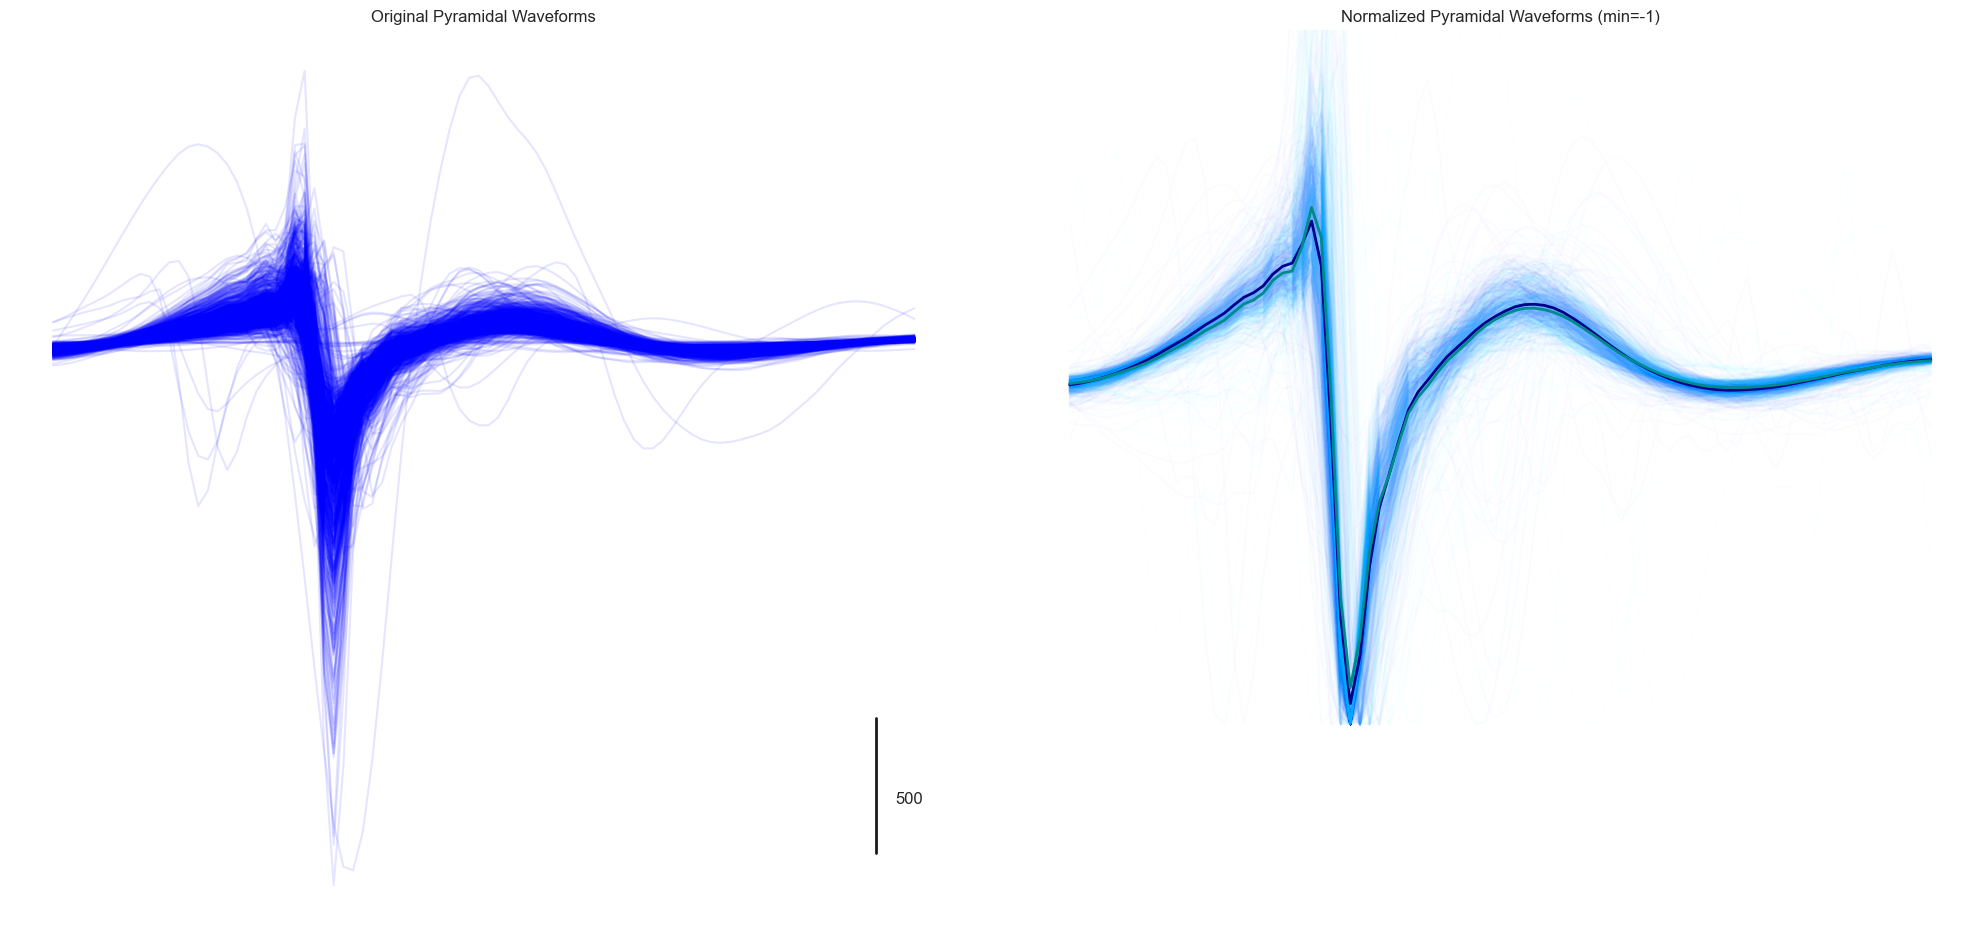

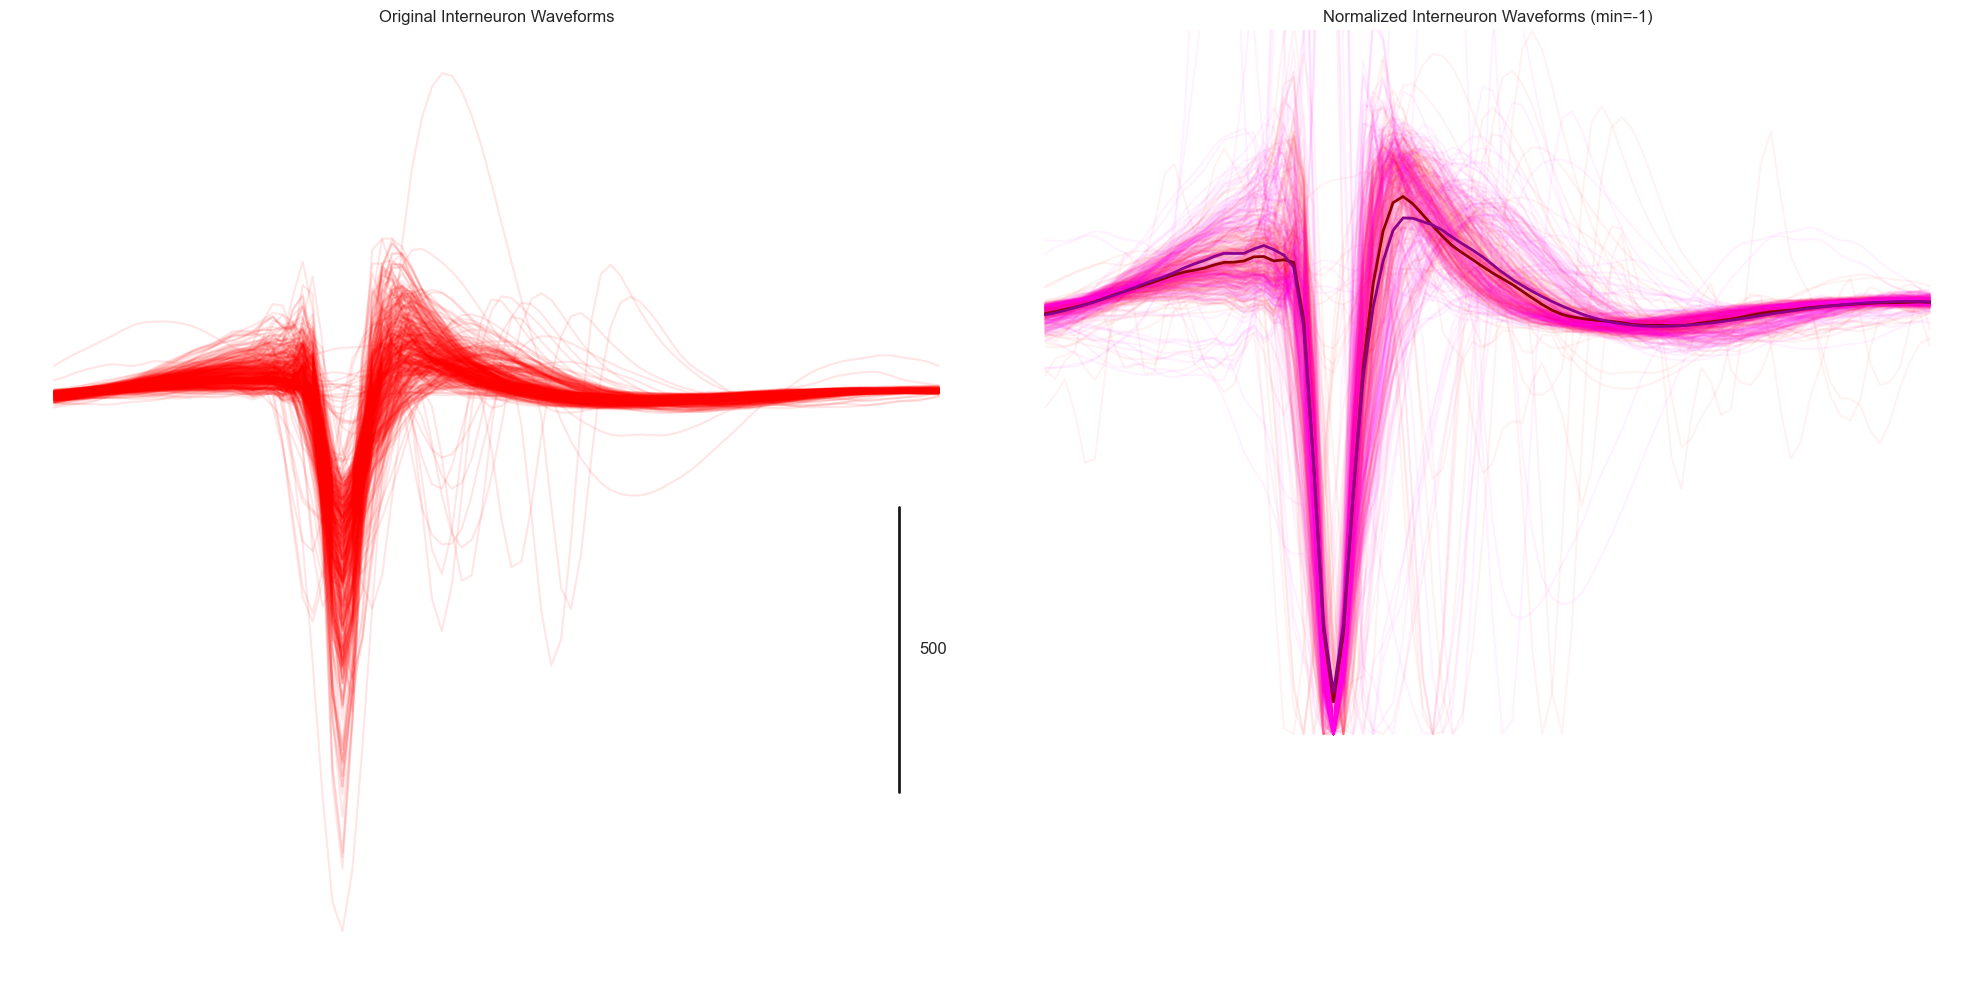

In [13]:
import numpy as np
import matplotlib.pyplot as plt
all_units_df=pd.read_pickle(r"Q:\sachuriga\CR_CA1_paper\tables/all_units_table_with_waveforms.pkl")

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

# Function to normalize waveforms
def normalize_waveform(wave):
    min_val = np.min(wave)
    return wave / abs(min_val)

# Filter data for control and experimental groups
control_pyramidal = all_units_df[(all_units_df['animal_id'].isin(control_ids)) & (all_units_df['buzaki_cell_type'] == 'pyramidal')]
exp_pyramidal = all_units_df[(all_units_df['animal_id'].isin(exp_ids)) & (all_units_df['buzaki_cell_type'] == 'pyramidal')]

control_interneuron = all_units_df[(all_units_df['animal_id'].isin(control_ids)) & (all_units_df['buzaki_cell_type'] == 'narrow_spike_interneurons')]
exp_interneuron = all_units_df[(all_units_df['animal_id'].isin(exp_ids)) & (all_units_df['buzaki_cell_type'] == 'narrow_spike_interneurons')]

# Normalize waveforms
control_pyramidal['normalized_waveform'] = control_pyramidal['waveform'].apply(normalize_waveform)
exp_pyramidal['normalized_waveform'] = exp_pyramidal['waveform'].apply(normalize_waveform)
control_interneuron['normalized_waveform'] = control_interneuron['waveform'].apply(normalize_waveform)
exp_interneuron['normalized_waveform'] = exp_interneuron['waveform'].apply(normalize_waveform)

# Calculate median waveforms
median_control_pyramidal = np.mean(np.stack(control_pyramidal['normalized_waveform'].tolist()), axis=0)
median_exp_pyramidal = np.mean(np.stack(exp_pyramidal['normalized_waveform'].tolist()), axis=0)

median_control_interneuron = np.mean(np.stack(control_interneuron['normalized_waveform'].tolist()), axis=0)
median_exp_interneuron = np.mean(np.stack(exp_interneuron['normalized_waveform'].tolist()), axis=0)

# Assuming 'all_units_df' is your DataFrame with 'cell_type' and 'waveform' columns
# First figure: Original waveforms
fig = plt.figure(figsize=(20, 10))  # Increased width to accommodate two subplots

# Subplot 1: Original pyramidal cells
plt.subplot(1, 2, 1)
py = all_units_df[all_units_df['buzaki_cell_type'] == "pyramidal"]
for wave in py['waveform']:
    if np.abs(np.min(wave)) > np.abs(np.max(wave)):
        plt.plot(wave, color="blue", alpha=0.1)
plt.title('Original Pyramidal Waveforms')
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.axis('off')  # Remove axes
# Add a vertical scale bar for 100 units
plt.plot([85, 85], [-1400, -1900], 'k-', linewidth=2)  # Black line, 2 pixels wide
plt.text(87, -1700, '500', verticalalignment='center')  # Add text label
plt.axis('off')  # Remove axes

# # Subplot 2: Normalized pyramidal cells
plt.subplot(1, 2, 2)

for wave in control_pyramidal['normalized_waveform']:
    #if np.abs(np.min(wave)) > np.abs(np.max(wave)):
    plt.plot(wave, color='blue', alpha=0.01)

for wave in exp_pyramidal['normalized_waveform']:
   #if np.abs(np.min(wave)) > np.abs(np.max(wave)):
    plt.plot(wave, color='cyan', alpha=0.01)

plt.title('Normalized Pyramidal Waveforms (min=-1)')  # Corrected title
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
# Plot median pyramidal cell waveforms
plt.plot(median_control_pyramidal, linewidth=2, color='darkblue')
plt.plot(median_exp_pyramidal, linewidth=2, color='darkcyan')
plt.tight_layout()
plt.axis('off')  # Remove axes
plt.ylim(-1.5625, 0.9375)
plt.savefig(r'Q:\sachuriga/CR_CA1_paper/Results/Cell_type/waveforms_pyramidal.png')

# Second figure: Interneurons
fig2 = plt.figure(figsize=(20, 10))

# Subplot 1: Original interneurons
plt.subplot(1, 2, 1)
py = all_units_df[all_units_df['buzaki_cell_type'] == "narrow_spike_interneurons"]
for wave in py['waveform']:
    if np.abs(np.min(wave)) > np.abs(np.max(wave)):
        plt.plot(wave, color="red", alpha=0.1)
plt.title('Original Interneuron Waveforms')
plt.xlabel('Time')
plt.ylabel('Amplitude')
#plt.axis('off')  # Remove axes
plt.plot([85, 85], [-200, -700], 'k-', linewidth=2)  # Black line, 2 pixels wide
plt.text(87, -450, '500', verticalalignment='center')  # Add text label
plt.axis('off')  # Remove axes

# Subplot 2: Normalized interneurons
plt.subplot(1, 2, 2)
# for wave in py['waveform']:
#     if np.abs(np.min(wave)) > np.abs(np.max(wave)):
#         # Normalize by the minimum value to make it -1
#         min_val = np.min(wave)
#         normalized_wave = wave / abs(min_val)  # Divide by the absolute value to make the minimum -1
#         plt.plot(normalized_wave, color="red", alpha=0.1)
# Plot individual interneuron traces
for wave in control_interneuron['normalized_waveform']:
    plt.plot(wave, color='red', alpha=0.05)

for wave in exp_interneuron['normalized_waveform']:
    plt.plot(wave, color='magenta', alpha=0.05)
# Plot median interneuron waveforms
plt.plot(median_control_interneuron, linewidth=2, color='darkred')
plt.plot(median_exp_interneuron, linewidth=2, color='darkmagenta')
plt.ylim(-1.5625, 0.65)
plt.title('Normalized Interneuron Waveforms (min=-1)')  # Corrected title
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
plt.axis('off')  # Remove axes
plt.tight_layout()
plt.savefig(r'Q:\sachuriga/CR_CA1_paper/Results/Cell_type/waveforms_interneurons.png')
plt.show()


C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\4231954331.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_pyramidal['normalized_waveform'] = control_pyramidal['waveform'].apply(normalize_waveform)
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\4231954331.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_pyramidal['normalized_waveform'] = exp_pyramidal['waveform'].apply(normalize_waveform)
C:\Users\sachur\AppData\Local\Temp\ipykernel_5916\4231954331.py:26: SettingWithCopyWarning: 
A

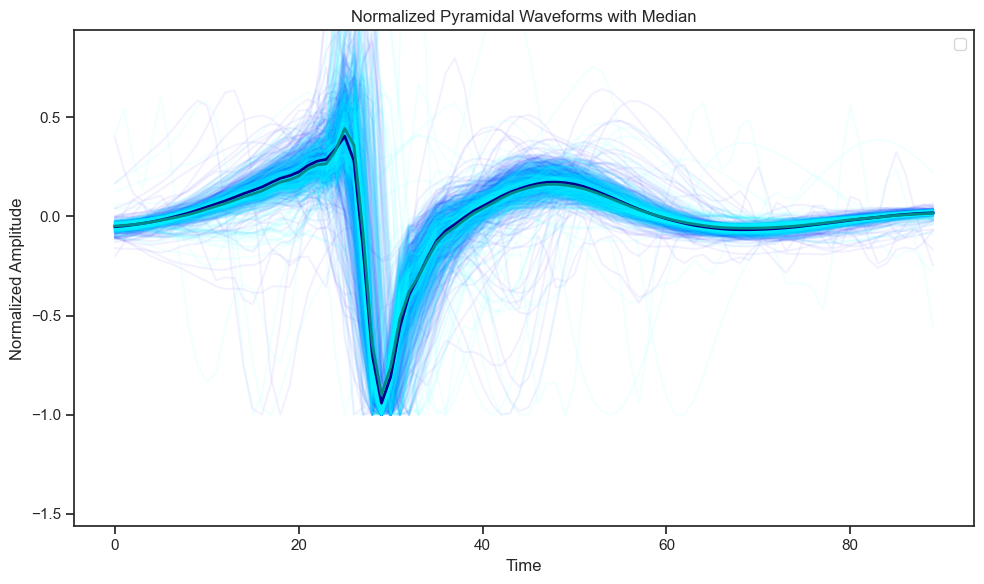

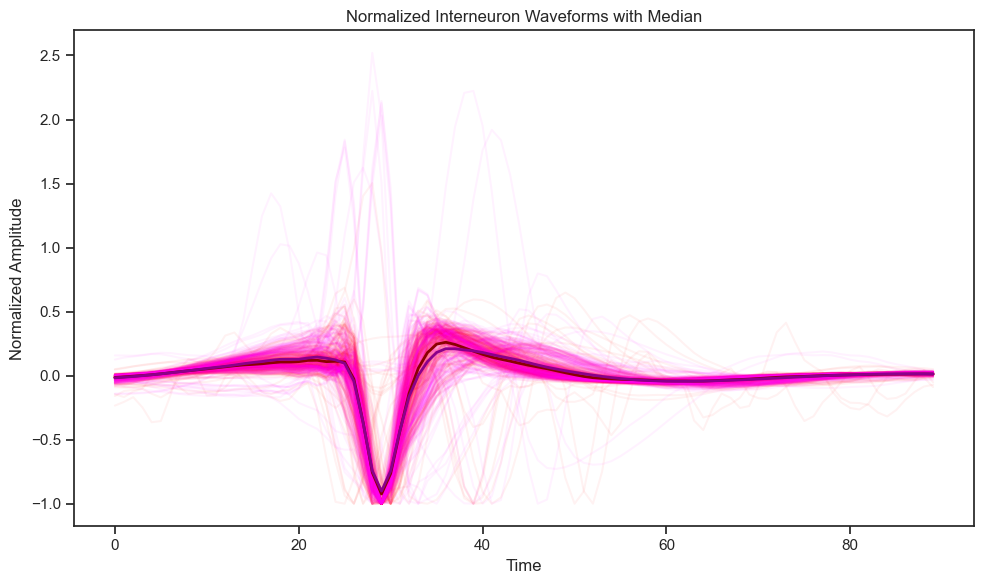

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming all_units_df is already defined
# all_units_df = ...  # Replace with your DataFrame loading if needed

control_ids = ['65165', '65091', '63383', '66539', '65622']
exp_ids = ['65588', '63385', '66538', '66537', '66922']

# Function to normalize waveforms
def normalize_waveform(wave):
    min_val = np.min(wave)
    return wave / abs(min_val)

# Filter data for control and experimental groups
control_pyramidal = all_units_df[(all_units_df['animal_id'].isin(control_ids)) & (all_units_df['buzaki_cell_type'] == 'pyramidal')]
exp_pyramidal = all_units_df[(all_units_df['animal_id'].isin(exp_ids)) & (all_units_df['buzaki_cell_type'] == 'pyramidal')]

control_interneuron = all_units_df[(all_units_df['animal_id'].isin(control_ids)) & (all_units_df['buzaki_cell_type'] == 'narrow_spike_interneurons')]
exp_interneuron = all_units_df[(all_units_df['animal_id'].isin(exp_ids)) & (all_units_df['buzaki_cell_type'] == 'narrow_spike_interneurons')]

# Normalize waveforms
control_pyramidal['normalized_waveform'] = control_pyramidal['waveform'].apply(normalize_waveform)
exp_pyramidal['normalized_waveform'] = exp_pyramidal['waveform'].apply(normalize_waveform)
control_interneuron['normalized_waveform'] = control_interneuron['waveform'].apply(normalize_waveform)
exp_interneuron['normalized_waveform'] = exp_interneuron['waveform'].apply(normalize_waveform)

# Calculate median waveforms
median_control_pyramidal = np.mean(np.stack(control_pyramidal['normalized_waveform'].tolist()), axis=0)
median_exp_pyramidal = np.mean(np.stack(exp_pyramidal['normalized_waveform'].tolist()), axis=0)

median_control_interneuron = np.mean(np.stack(control_interneuron['normalized_waveform'].tolist()), axis=0)
median_exp_interneuron = np.mean(np.stack(exp_interneuron['normalized_waveform'].tolist()), axis=0)

# Plotting individual traces and median
plt.figure(figsize=(10, 6))

# Plot individual pyramidal cell traces
for wave in control_pyramidal['normalized_waveform']:
    plt.plot(wave, color='blue', alpha=0.05)

for wave in exp_pyramidal['normalized_waveform']:
    plt.plot(wave, color='cyan', alpha=0.05)

# Plot median pyramidal cell waveforms
plt.plot(median_control_pyramidal, linewidth=2, color='darkblue')
plt.plot(median_exp_pyramidal, linewidth=2, color='darkcyan')
plt.ylim(-1.5625, 0.9375)
plt.title('Normalized Pyramidal Waveforms with Median')
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

# Plot individual interneuron traces
for wave in control_interneuron['normalized_waveform']:
    plt.plot(wave, color='red', alpha=0.05)

for wave in exp_interneuron['normalized_waveform']:
    plt.plot(wave, color='magenta', alpha=0.05)

# Plot median interneuron waveforms
plt.plot(median_control_interneuron, linewidth=2, color='darkred')
plt.plot(median_exp_interneuron, linewidth=2, color='darkmagenta')

plt.title('Normalized Interneuron Waveforms with Median')
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
plt.tight_layout()
plt.show()